# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
#Read/Importing data
df= pd.read_csv(r'h1n1_vaccine_prediction.csv')

In [3]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#Keeping copy of file for future
df1= df.copy()

## Data Cleaning and Preprocessing

In [5]:
#To display top 5 rows of the table
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [6]:
#To display number of rows and columns
df.shape

(26707, 34)

In [7]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [8]:
#To display data types of columns
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [9]:
#To display list of columns
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [10]:
#To display number of missing values and treat them
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
#To check missing values in percentage
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

has_health_insur             45.957989
income_level                 16.561201
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
housing_status                7.645936
employment                    5.477965
marital_status                5.272026
qualification                 5.268282
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
sick_from_seas_vacc           2.010709
is_seas_risky                 1.924589
is_seas_vacc_effective        1.729884
sick_from_h1n1_vacc           1.479013
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
no_of_children                0.932340
no_of_adults                  0.932340
contact_avoidance             0.778822
avoid_touch_face              0.479275
h1n1_awareness                0.434343
h1n1_worry                    0.344479
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
antiviral_medication     

In [12]:
# Dropping features having more than 7% null values
df.drop(['has_health_insur','income_level','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'housing_status'], axis=1, inplace=True)

In [13]:
#Droping rows in features having less than 7% null values
df.dropna(axis=0, inplace=True)

In [14]:
#To check missing values in percentage
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

unique_id                    0.0
sick_from_h1n1_vacc          0.0
no_of_children               0.0
no_of_adults                 0.0
census_msa                   0.0
employment                   0.0
marital_status               0.0
sex                          0.0
race                         0.0
qualification                0.0
age_bracket                  0.0
sick_from_seas_vacc          0.0
is_seas_risky                0.0
is_seas_vacc_effective       0.0
is_h1n1_risky                0.0
h1n1_worry                   0.0
is_h1n1_vacc_effective       0.0
is_health_worker             0.0
cont_child_undr_6_mnths      0.0
chronic_medic_condition      0.0
avoid_touch_face             0.0
reduced_outside_home_cont    0.0
avoid_large_gatherings       0.0
wash_hands_frequently        0.0
bought_face_mask             0.0
contact_avoidance            0.0
antiviral_medication         0.0
h1n1_awareness               0.0
h1n1_vaccine                 0.0
dtype: float64

In [15]:
#To display number of duplicate values
df.duplicated().sum()

0

# EDA - Exploratory Data Analysis

In [16]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')
Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [17]:
#To display values and its count for categorical columns
for i in cat_cols:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

Feature age_bracket
Unique Values - 5
Value Counts
65+ Years        6050
55 - 64 Years    5119
45 - 54 Years    4758
18 - 34 Years    4663
35 - 44 Years    3412
Name: age_bracket, dtype: int64
----------------------------------------
Feature qualification
Unique Values - 4
Value Counts
College Graduate    9640
Some College        6713
12 Years            5464
< 12 Years          2185
Name: qualification, dtype: int64
----------------------------------------
Feature race
Unique Values - 4
Value Counts
White                19175
Black                 1876
Hispanic              1557
Other or Multiple     1394
Name: race, dtype: int64
----------------------------------------
Feature sex
Unique Values - 2
Value Counts
Female    14364
Male       9638
Name: sex, dtype: int64
----------------------------------------
Feature marital_status
Unique Values - 2
Value Counts
Married        12939
Not Married    11063
Name: marital_status, dtype: int64
----------------------------------------
Feature 

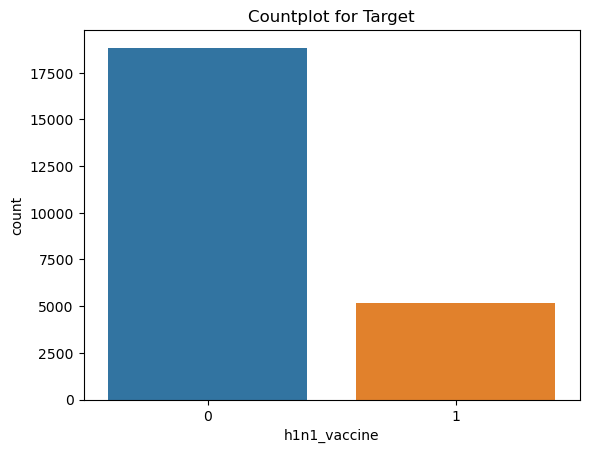

In [18]:
#To display countplot of target variable
sns.countplot(x=df['h1n1_vaccine'])
plt.title('Countplot for Target')
plt.show()

In [19]:
#To display basic statistical values for numeric columns
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000
mean,13365.519582,1.621532,1.282393,0.047621,0.733856,0.067703,0.830181,0.357679,0.335389,0.682318,0.285060,0.082576,0.113907,3.877135,2.346721,2.353262,4.045830,2.733772,2.109866,0.891801,0.524831,0.214815
std,7708.393338,0.900305,0.606615,0.212968,0.441950,0.251240,0.375482,0.479327,0.472136,0.465585,0.451452,0.275247,0.317705,0.996822,1.285868,1.358336,1.073127,1.386165,1.327961,0.750096,0.920753,0.410703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6696.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13372.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20044.750000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


## Univariate analysis

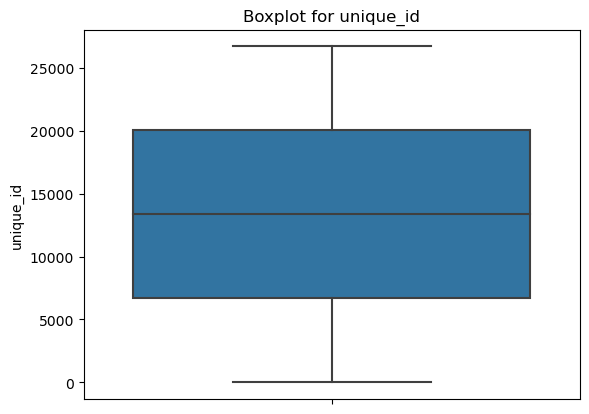

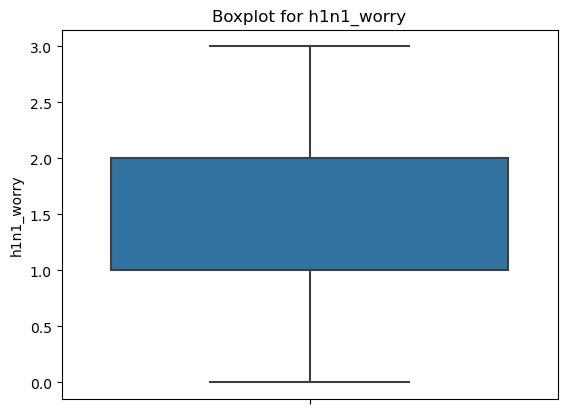

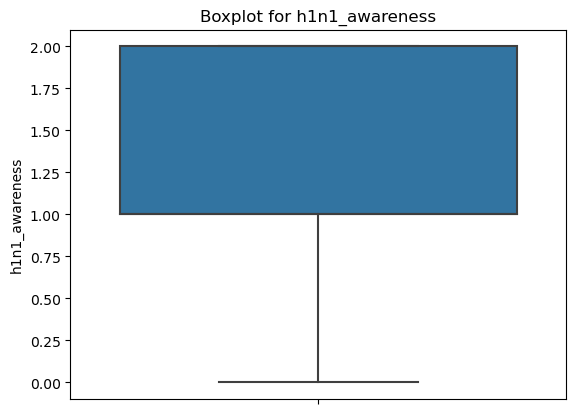

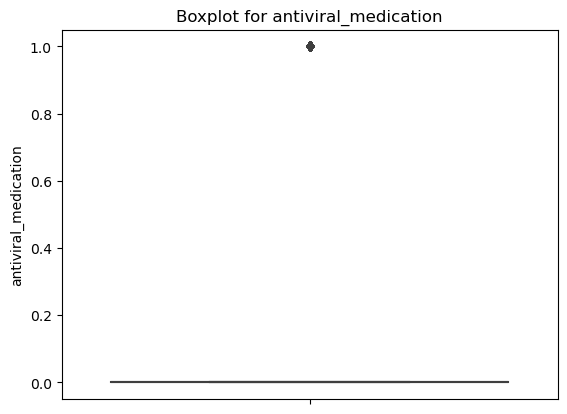

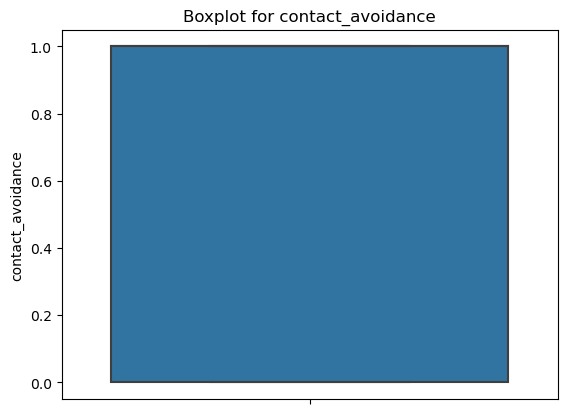

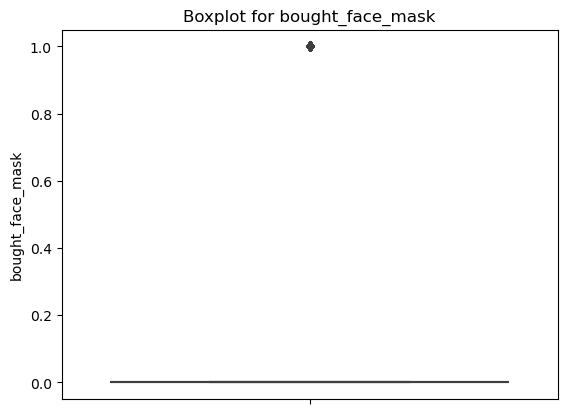

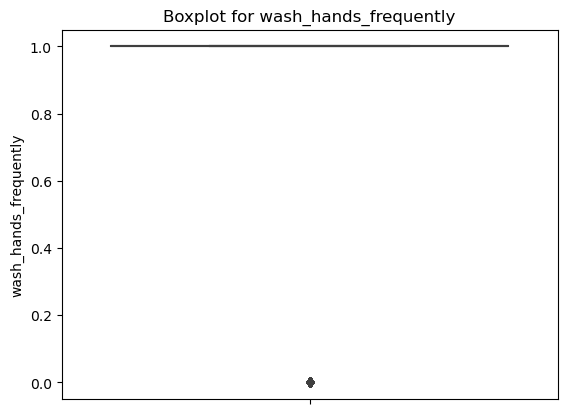

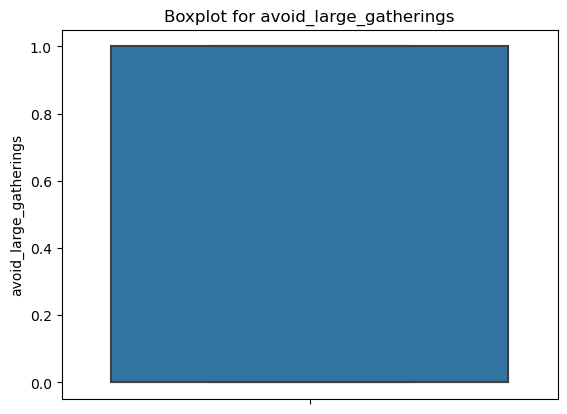

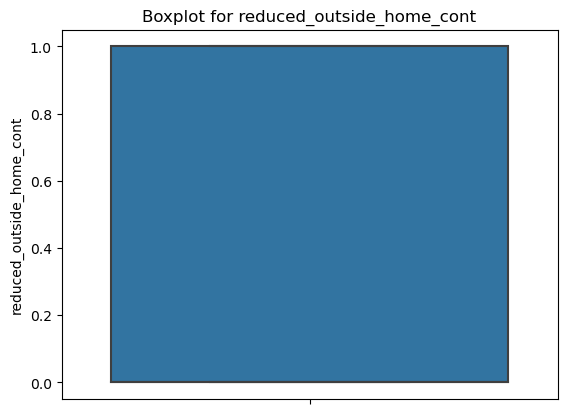

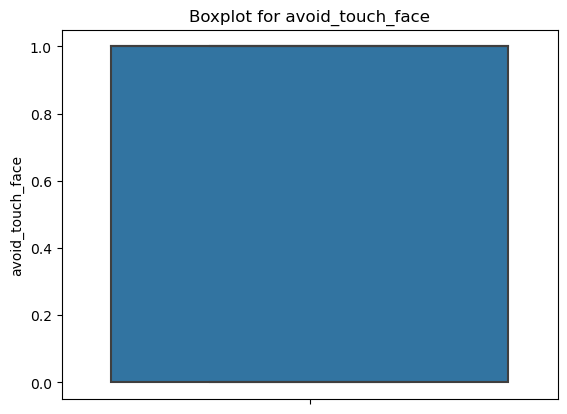

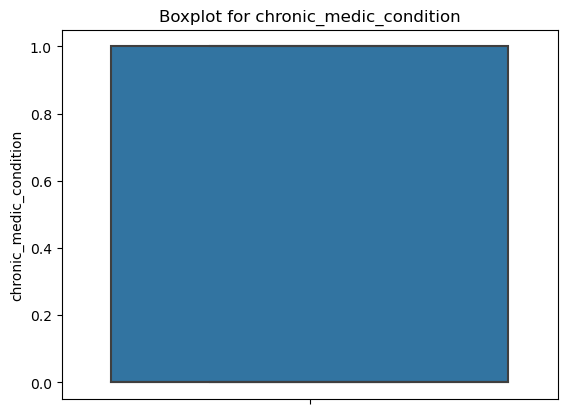

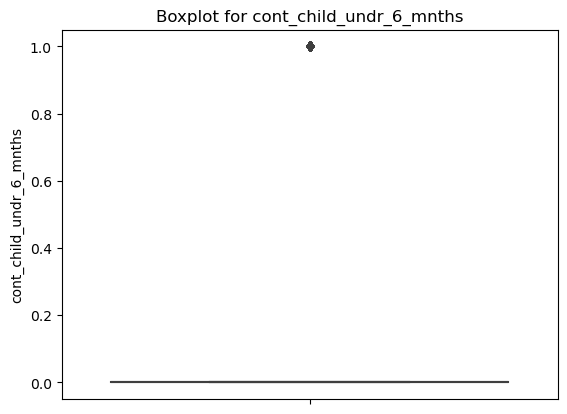

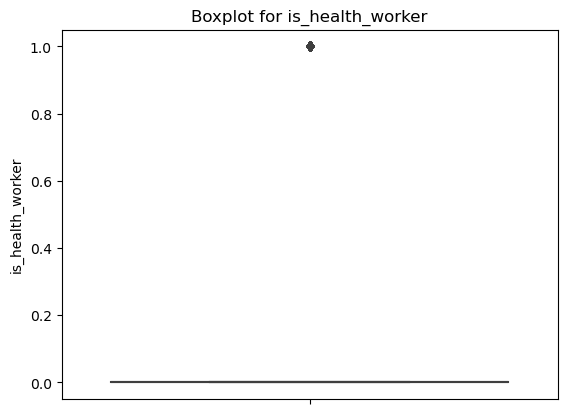

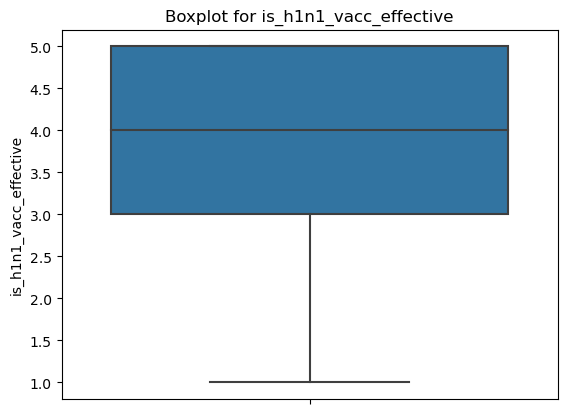

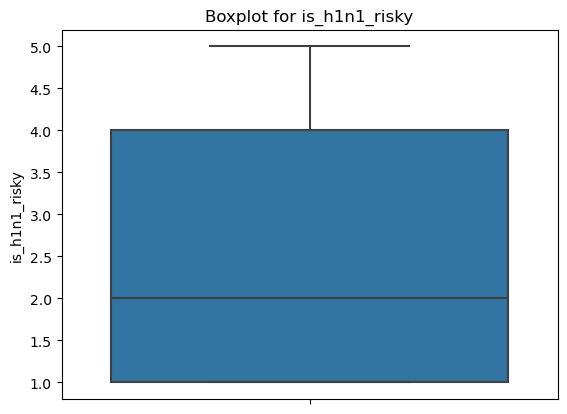

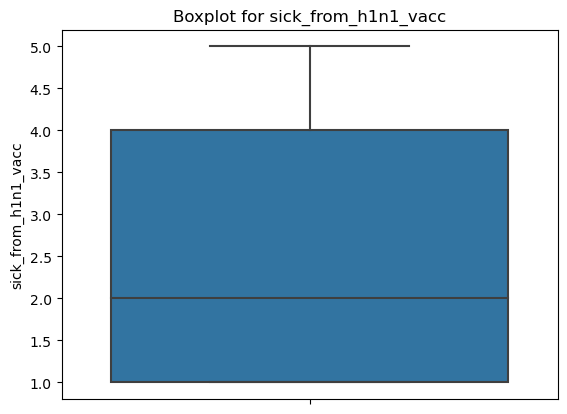

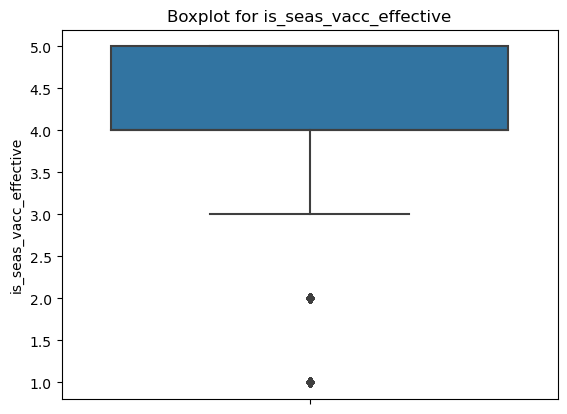

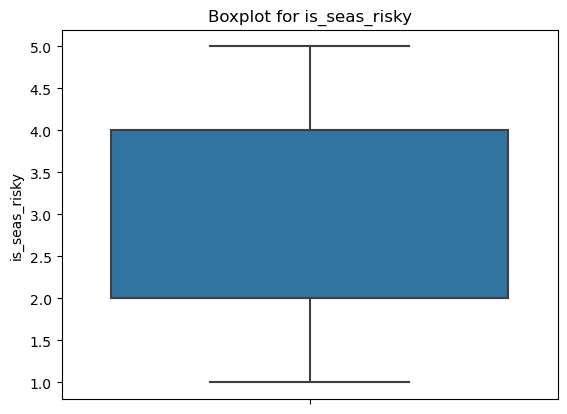

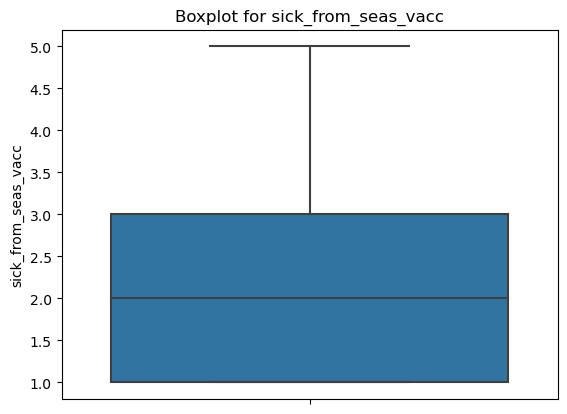

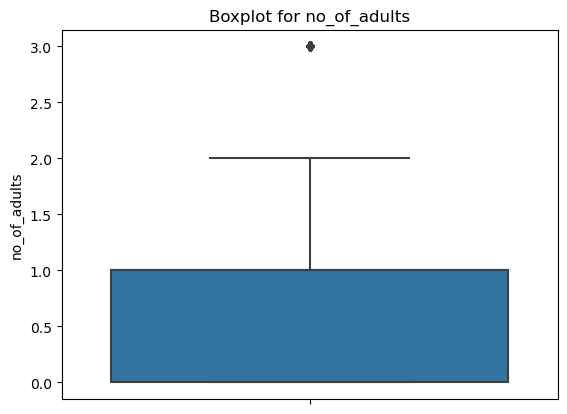

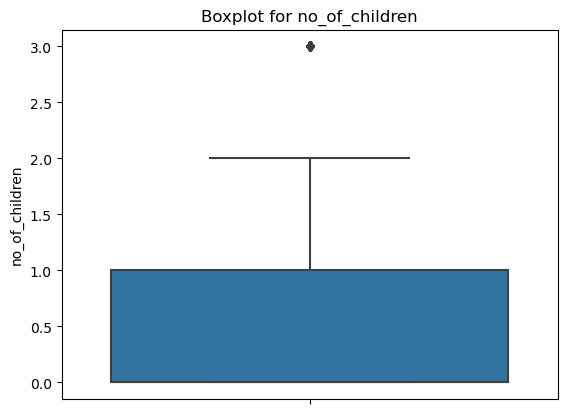

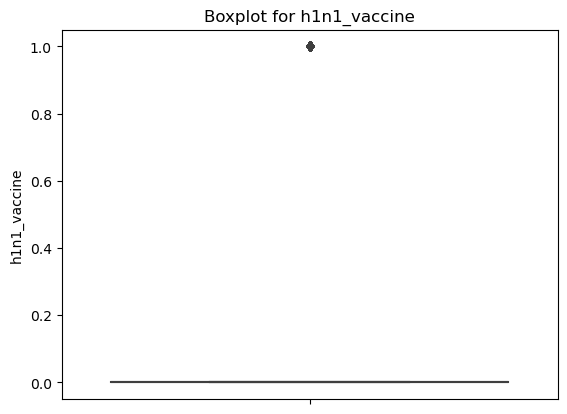

In [20]:
#To display box plot for all numeric columns
for i in num_cols:
    sns.boxplot(y=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

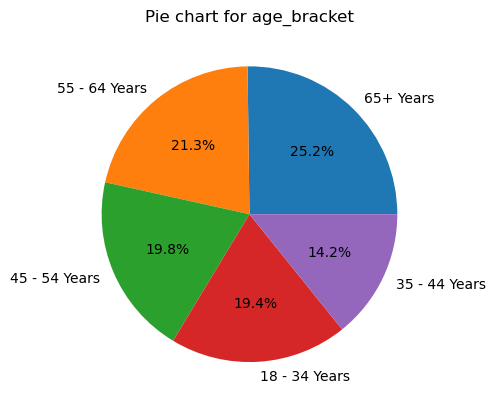

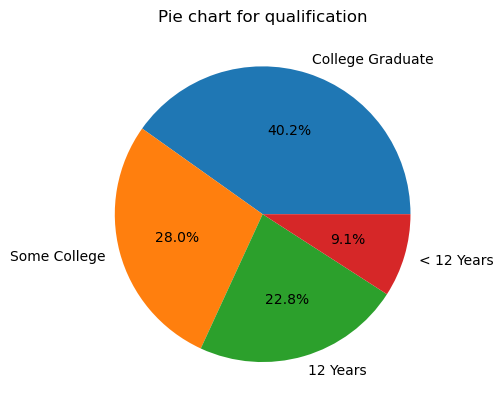

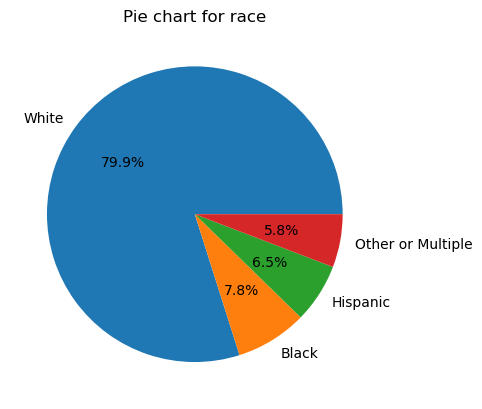

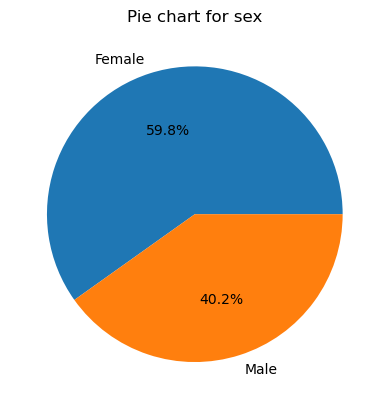

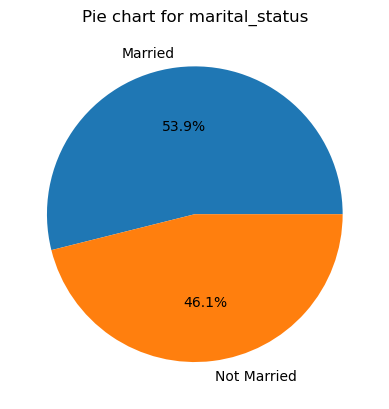

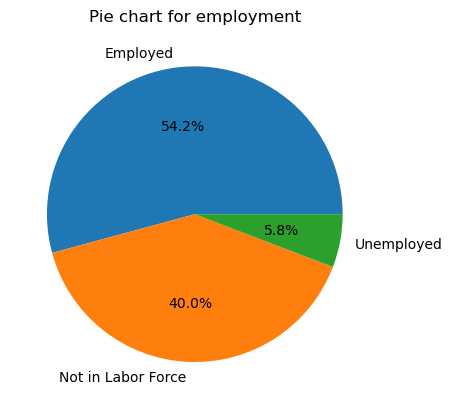

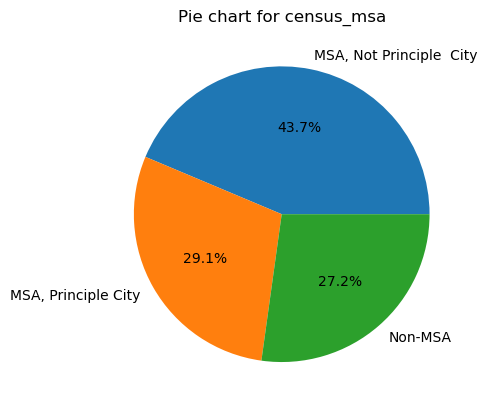

In [21]:
#To display pie chart for all categorical columns
for i in cat_cols:
    count = df[i].value_counts()
    labels = count.index.tolist()
    sizes = count.values.tolist()
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Pie chart for {i}')
    plt.show()

## Bi-Variate Analysis

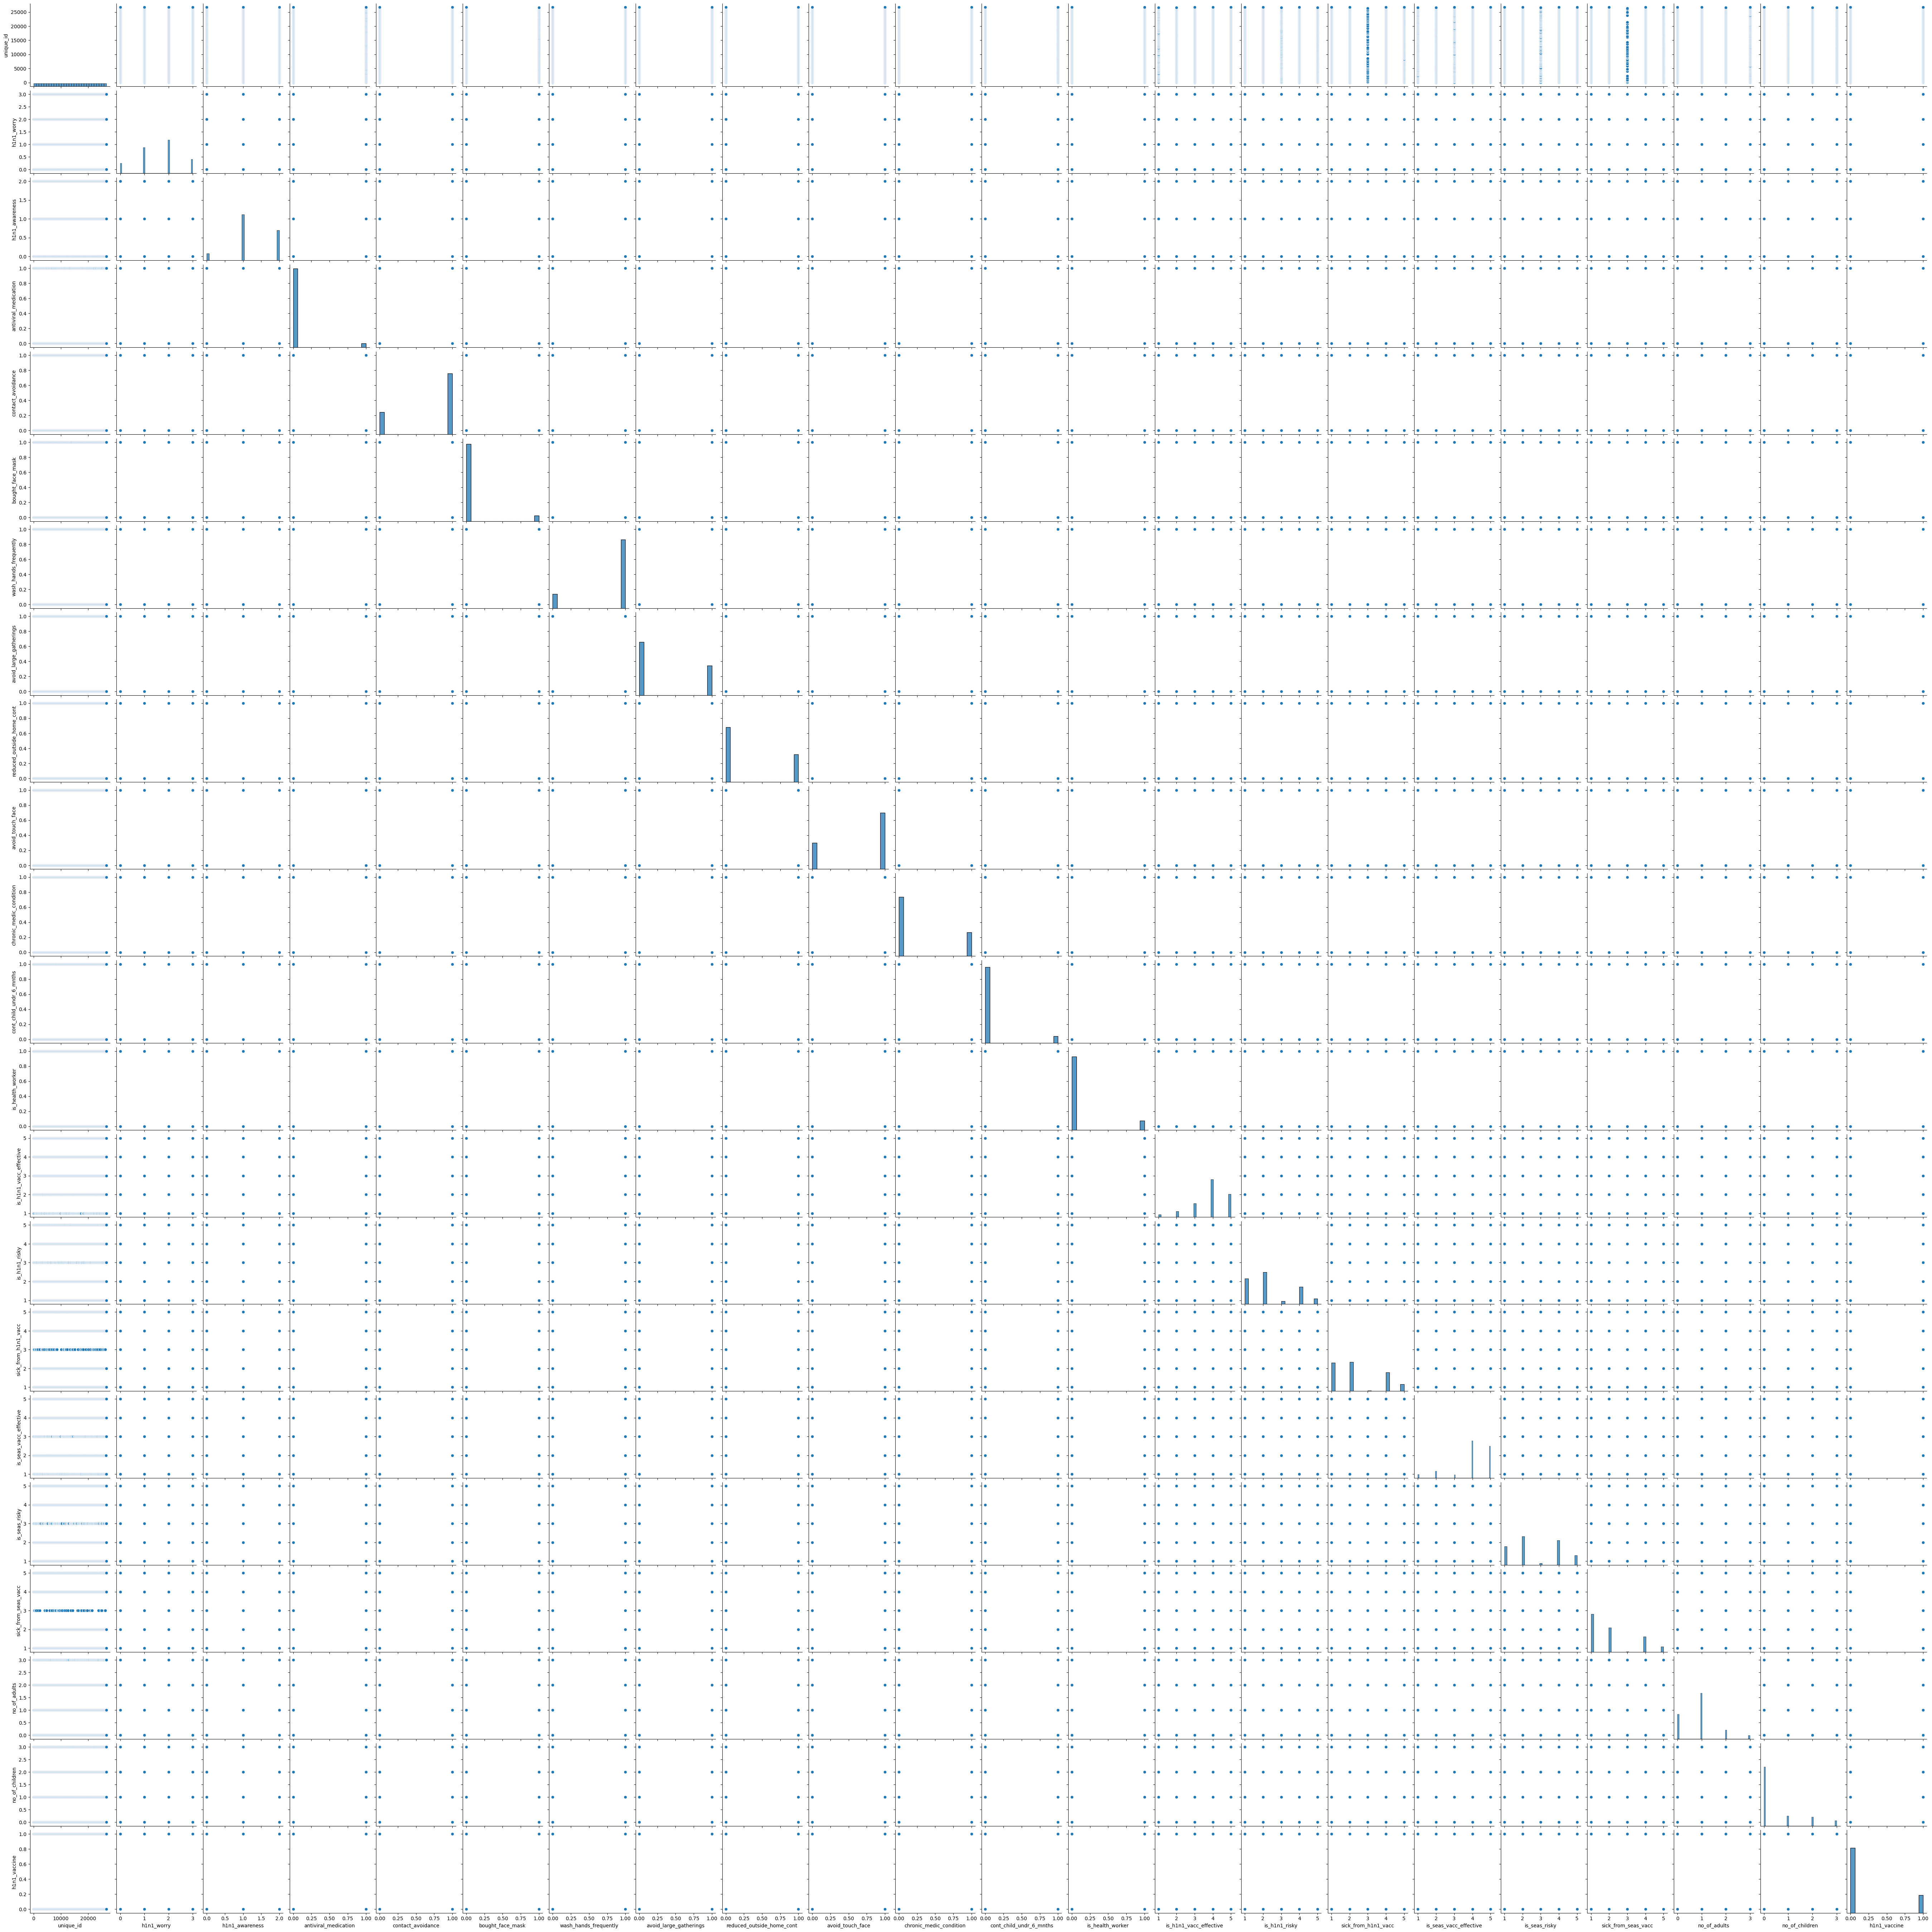

In [22]:
#To display pair plot between two numeric columns
sns.pairplot(df,vars=num_cols)
plt.show()

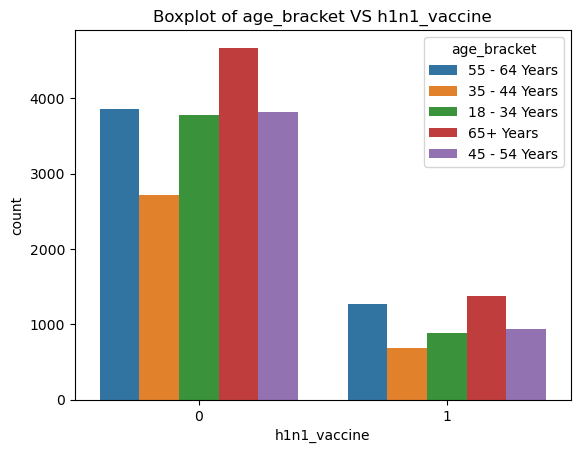

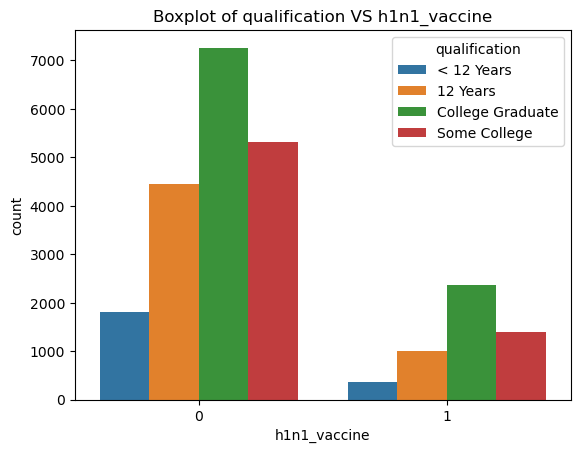

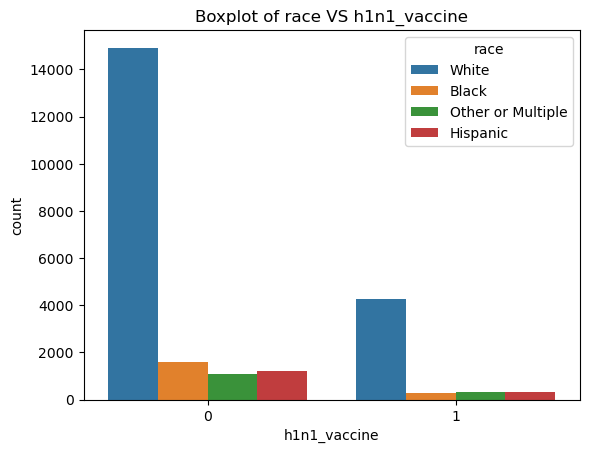

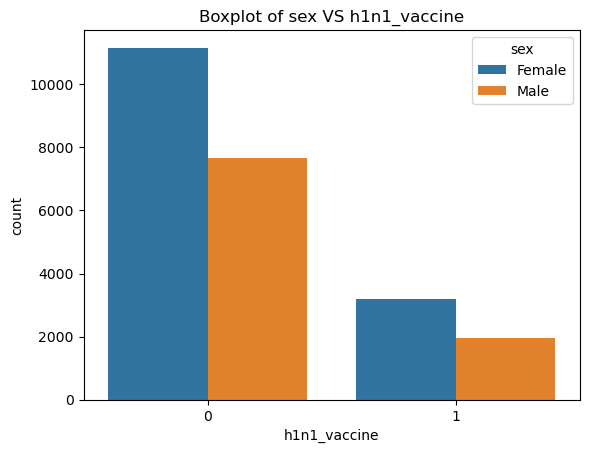

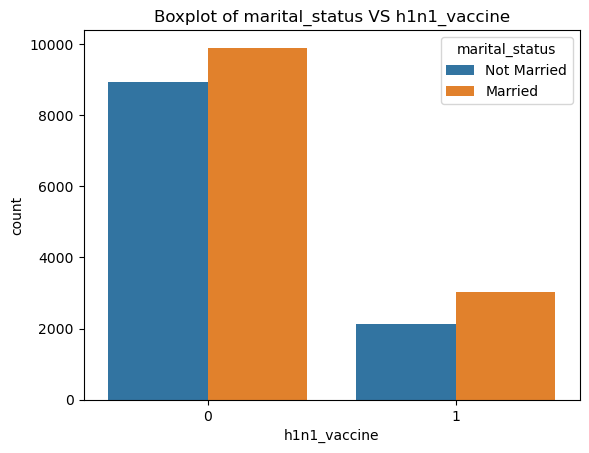

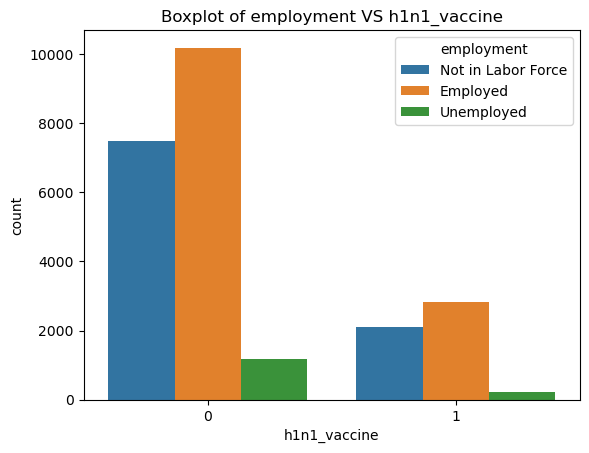

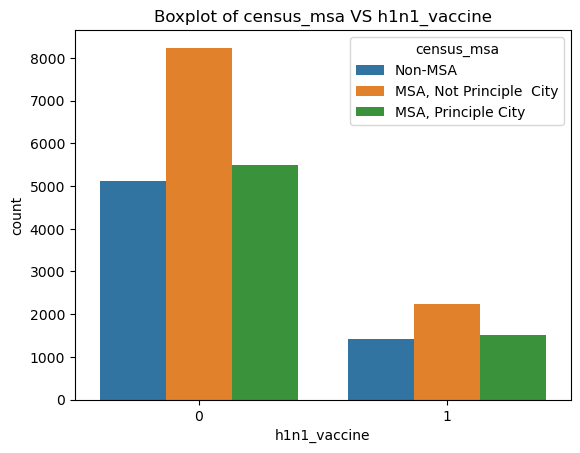

In [23]:
#To display box plot between numeric and categorical columns
for i in cat_cols:
    sns.countplot(x=df['h1n1_vaccine'],hue=df[i])
    plt.title(f'Boxplot of {i} VS h1n1_vaccine')
    plt.show()

Infernce
1) IDs who are somewhat worried about H1N1_vaccine are likely to be more vaccinated.
2) Ids who have not taken antiviral vaccination are more likely to be vaccinated
3) Ids who bear some chronic medical condition are more likely to be vaccinated

## Multi-variate Analysis

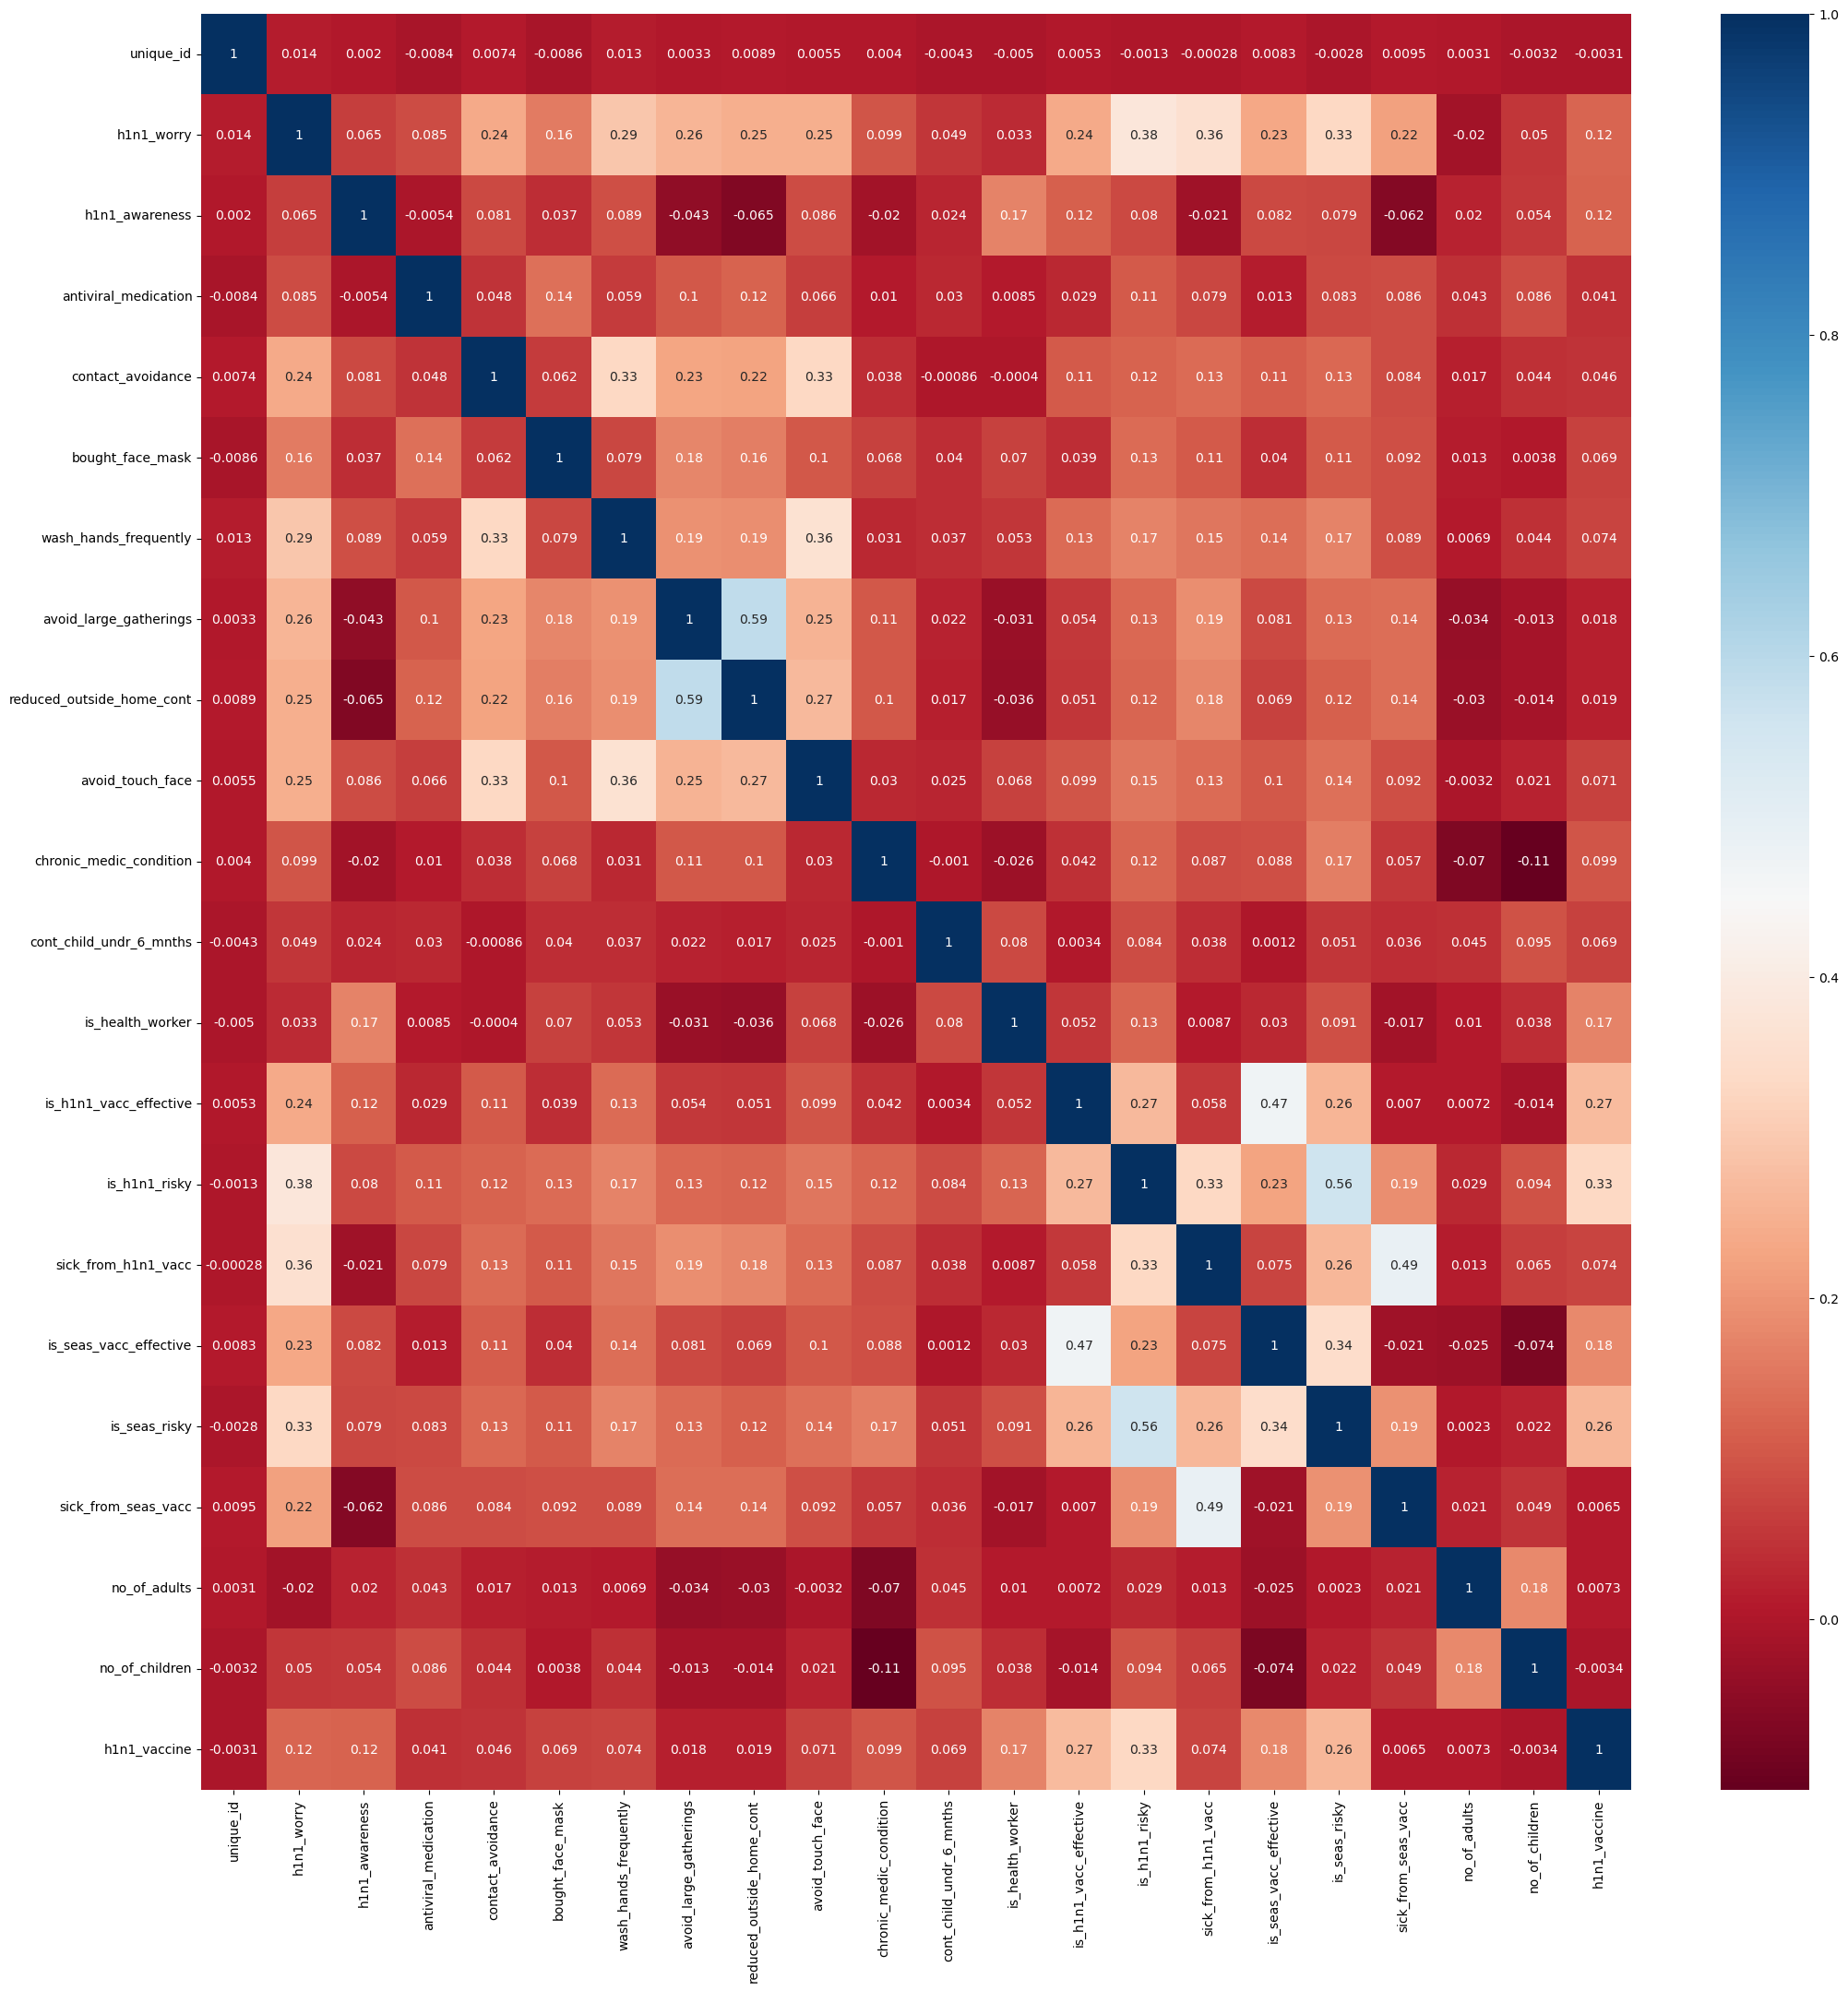

In [24]:
#To display correlation between different columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

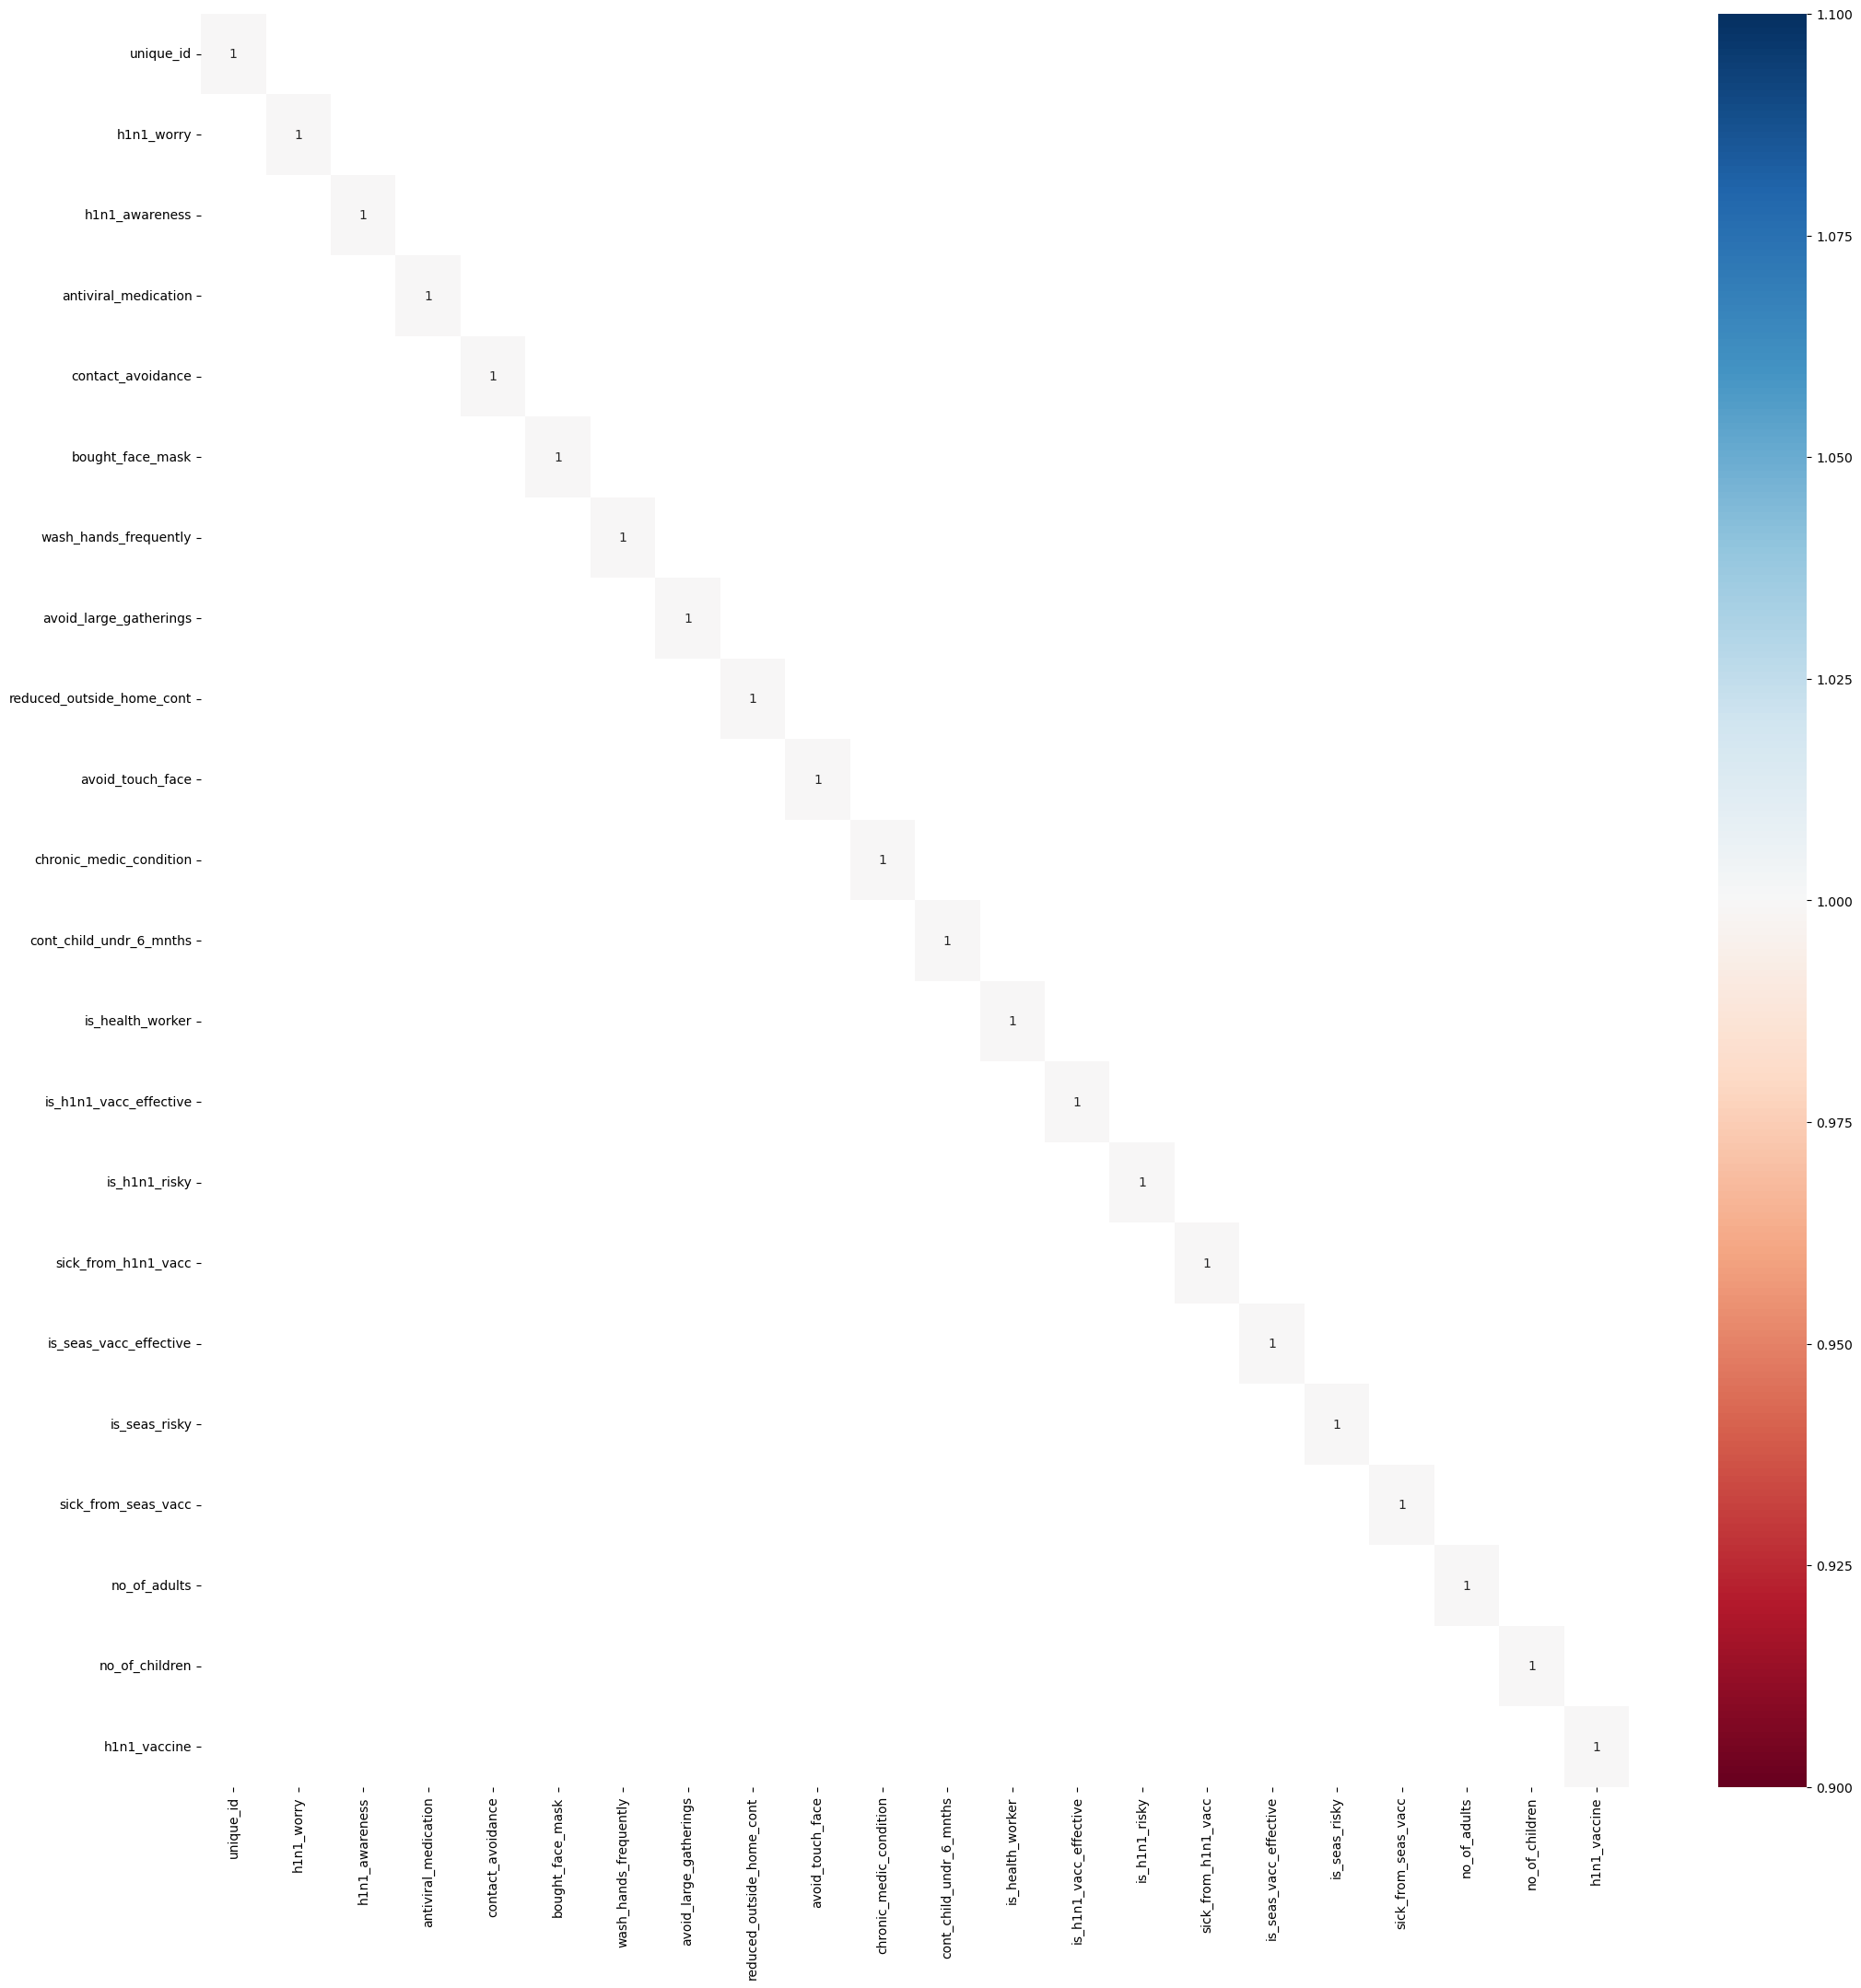

In [25]:
#To display columns that have high correlation
plt.figure(figsize=(25,25))
sns.heatmap(corr[abs(corr)>=0.7], annot=True, cmap='RdBu')
plt.show()

## Encoding categorical Columns

In [26]:
cat_cols

Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')

In [27]:
df = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(df.shape)
print(df.dtypes)

(24002, 38)
unique_id                           int64
h1n1_worry                        float64
h1n1_awareness                    float64
antiviral_medication              float64
contact_avoidance                 float64
bought_face_mask                  float64
wash_hands_frequently             float64
avoid_large_gatherings            float64
reduced_outside_home_cont         float64
avoid_touch_face                  float64
chronic_medic_condition           float64
cont_child_undr_6_mnths           float64
is_health_worker                  float64
is_h1n1_vacc_effective            float64
is_h1n1_risky                     float64
sick_from_h1n1_vacc               float64
is_seas_vacc_effective            float64
is_seas_risky                     float64
sick_from_seas_vacc               float64
no_of_adults                      float64
no_of_children                    float64
h1n1_vaccine                        int64
age_bracket_35 - 44 Years           uint8
age_bracket_45 - 54 Ye

In [28]:
df.rename(columns={'qualification_< 12 Years':'qualification_lessthan_12 Years',
                  'census_msa_MSA, Principle City':'census_msa_MSA_Principle City'},inplace=True)

# Model building

### Select the Dependent and Independent Features

In [29]:
x = df.drop('h1n1_vaccine',axis=1)
y = df['h1n1_vaccine']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(24002, 37) (24002,)


### Split the data into train and test set

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16801, 37)
(7201, 37)
(16801,)
(7201,)


### Createing Function to evalute the model performance

In [31]:
def eval_model(model,x_train,x_test,y_train,y_test):
    global train_score, test_score, precision, recall, acc, kappa, f1

    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)


    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')


    print('Accuracy_Score is', round(acc,4))
    print('precision Score is:', round(precision,4))
    print('Recall Score is:', round(recall,4))
    print('kappa Score is:', round(kappa,4))
    print('F1 Score is:', round(f1,4))


    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    print(classification_report(y_test,y_pred))

    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    plt.show()

In [32]:
def plot_roc_auc(model,y_test,ypred_proba):
    global auc
    fpr,tpr,thresh = roc_curve(y_test,ypred_proba[:,1])
    auc = roc_auc_score(y_test,ypred_proba[:,1])
    print('AUC:',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

In [33]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'AUC Score' , 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score, 'Test Score': test_score, 'AUC Score' : auc, 'Precision Score': precision, 'Recall Score': recall, 'Accuracy Score': acc, 'Kappa Score': kappa, 'f1-score': f1}, ignore_index = True)
    return(score_card)

# Logistic Regression


Training Score is: 80.08 %
Testing Score is: 80.03 %

Accuracy_Score is 0.8003
precision Score is: 0.5821
Recall Score is: 0.2369
kappa Score is: 0.243
F1 Score is: 0.3367

Confusion Matrix is
 [[5398  262]
 [1176  365]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5660
           1       0.58      0.24      0.34      1541

    accuracy                           0.80      7201
   macro avg       0.70      0.60      0.61      7201
weighted avg       0.77      0.80      0.77      7201



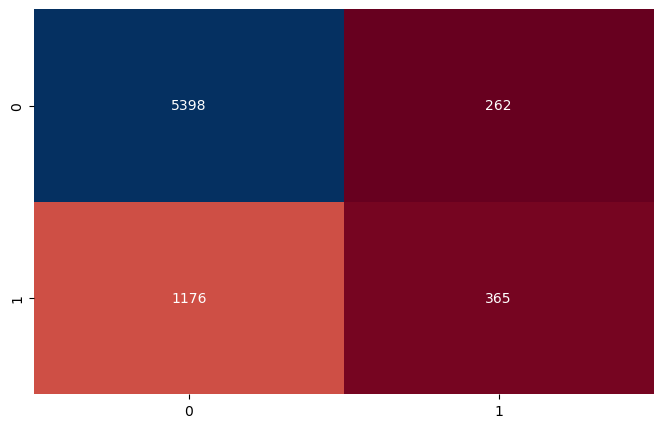

In [34]:
lr = LogisticRegression(max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

### ROC_AUC Curve

AUC: 0.7509105647060442


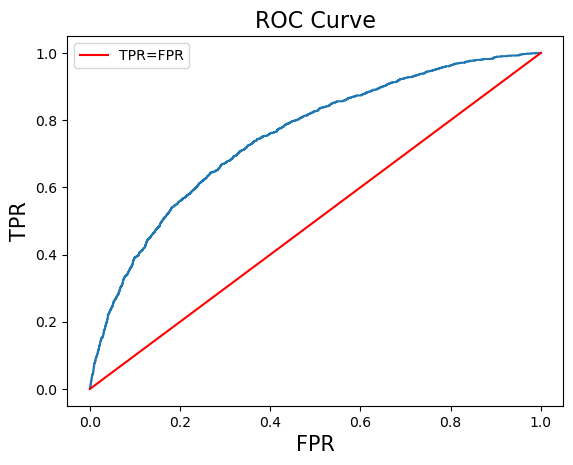

In [35]:
ypred_proba_lr = lr.predict_proba(x_test)
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_proba_lr)

In [36]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(best_thresh_idx)
print(thresh_lr1[best_thresh_idx])

1220
0.22900232130798273


#### Creating tabulated data for evaluation matrix

In [37]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716


### Logistic Regression (using SGD)


Training Score is: 21.52 %
Testing Score is: 21.4 %

Accuracy_Score is 0.214
precision Score is: 0.214
Recall Score is: 1.0
kappa Score is: 0.0
F1 Score is: 0.3526

Confusion Matrix is
 [[   0 5660]
 [   0 1541]]

Predictions:
 [1 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5660
           1       0.21      1.00      0.35      1541

    accuracy                           0.21      7201
   macro avg       0.11      0.50      0.18      7201
weighted avg       0.05      0.21      0.08      7201



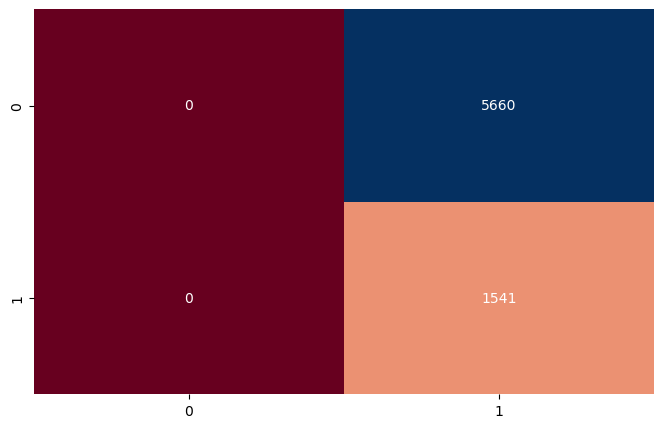

In [38]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

AUC: 0.7509105647060442


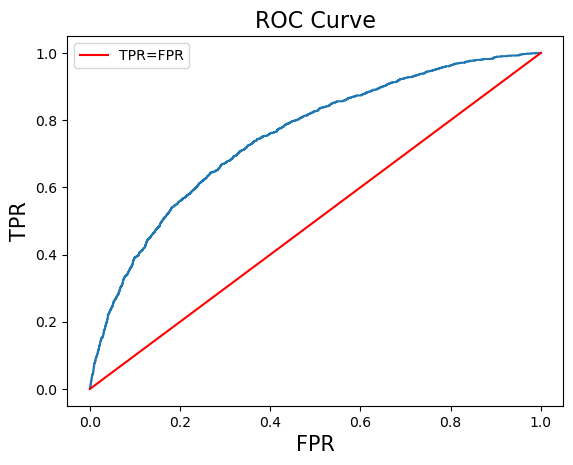

In [39]:
ypred_proba_lr_SGD = lr.predict_proba(x_test)

fpr_lr2,tpr_lr2,thresh_lr2 = plot_roc_auc(lr_SGD,y_test,ypred_proba_lr_SGD)


In [40]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551


# Decision Tree Classifier


Training Score is: 100.0 %
Testing Score is: 72.38 %

Accuracy_Score is 0.7238
precision Score is: 0.3693
Recall Score is: 0.4108
kappa Score is: 0.2112
F1 Score is: 0.3889

Confusion Matrix is
 [[4579 1081]
 [ 908  633]]

Predictions:
 [0 0 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5660
           1       0.37      0.41      0.39      1541

    accuracy                           0.72      7201
   macro avg       0.60      0.61      0.61      7201
weighted avg       0.73      0.72      0.73      7201



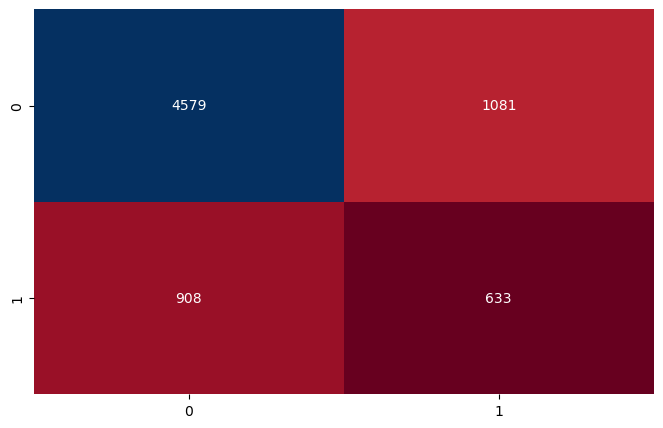

In [41]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)


AUC: 0.6098914132670492


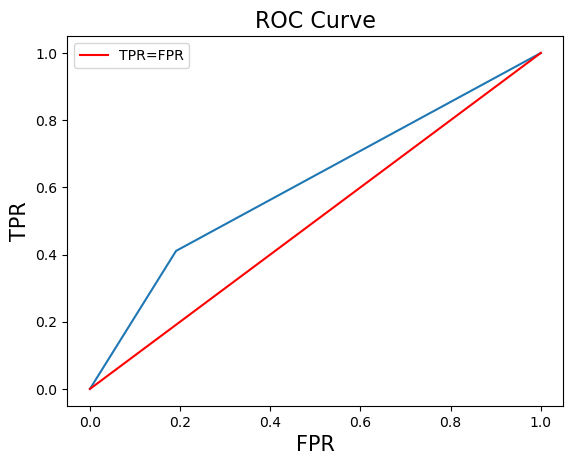

In [42]:
ypred_proba_dt1 = dt1.predict_proba(x_test)

fpr_dt1,tpr_dt1,thresh_dt1 = plot_roc_auc(dt1,y_test,ypred_proba_dt1)

In [43]:
update_score_card(model_name = 'Decision Tree Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940


### Decision Tree with Pruning

In [44]:
tuned_paramaters = [ {'criterion':['gini','entropy'],'max_depth':[8,9,10,11,12,14], 'min_samples_split':[8,10,12,14,15,16,20]}]

dt_CV= DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10} 




Training Score is: 82.77 %
Testing Score is: 80.89 %

Accuracy_Score is 0.8089
precision Score is: 0.6067
Recall Score is: 0.3043
kappa Score is: 0.3062
F1 Score is: 0.4054

Confusion Matrix is
 [[5356  304]
 [1072  469]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5660
           1       0.61      0.30      0.41      1541

    accuracy                           0.81      7201
   macro avg       0.72      0.63      0.65      7201
weighted avg       0.78      0.81      0.78      7201



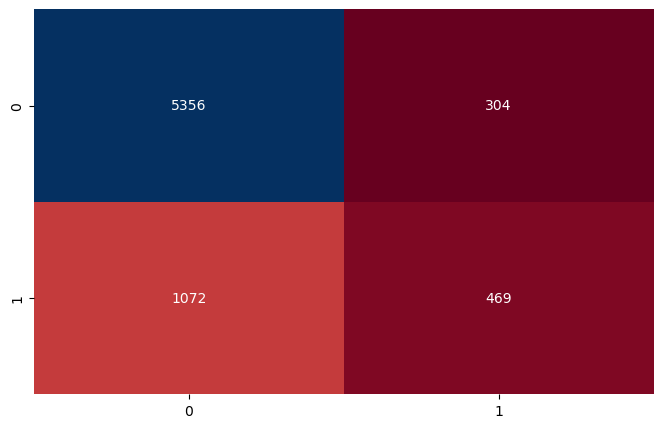

In [45]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=8, min_samples_split=10)
eval_model(dt2,x_train,x_test,y_train,y_test)

AUC: 0.758377264086695


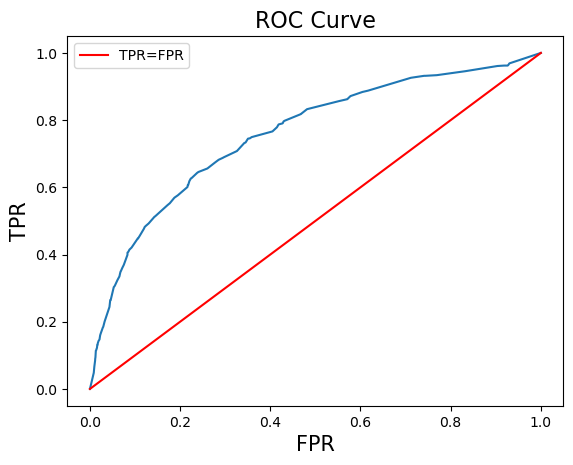

In [46]:
ypred_proba_dt2 = dt2.predict_proba(x_test)

fpr_dt2,tpr_dt2,thresh_dt2 = plot_roc_auc(dt2,y_test,ypred_proba_dt2)

In [47]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359


# Ensemble Learning

### Bagging Classifier


Training Score is: 97.95 %
Testing Score is: 80.10000000000001 %

Accuracy_Score is 0.801
precision Score is: 0.5643
Recall Score is: 0.3076
kappa Score is: 0.2911
F1 Score is: 0.3982

Confusion Matrix is
 [[5294  366]
 [1067  474]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5660
           1       0.56      0.31      0.40      1541

    accuracy                           0.80      7201
   macro avg       0.70      0.62      0.64      7201
weighted avg       0.77      0.80      0.78      7201



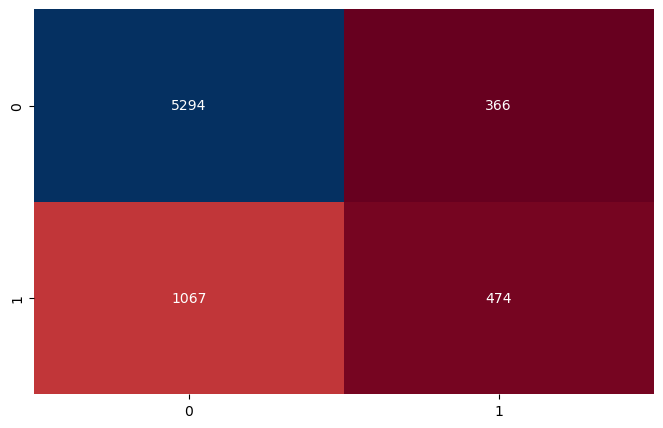

In [48]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

AUC: 0.7283421003753701


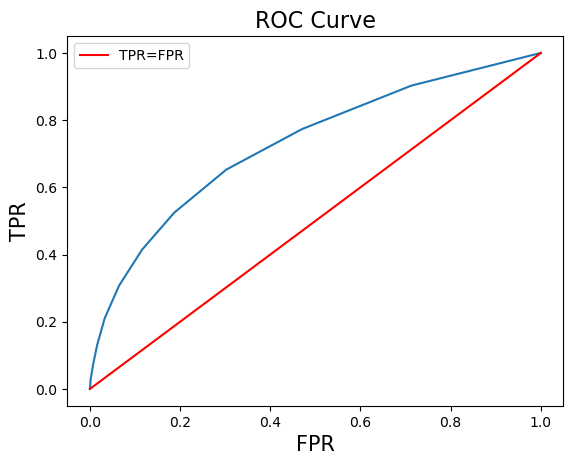

In [49]:
ypred_proba_bag = bag.predict_proba(x_test)

fpr_bag,tpr_bag,thresh_bag = plot_roc_auc(bag,y_test,ypred_proba_bag)

In [50]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152


### AdaBoost Classifier


Training Score is: 100.0 %
Testing Score is: 72.43 %

Accuracy_Score is 0.7243
precision Score is: 0.373
Recall Score is: 0.4231
kappa Score is: 0.2188
F1 Score is: 0.3965

Confusion Matrix is
 [[4564 1096]
 [ 889  652]]

Predictions:
 [0 0 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      5660
           1       0.37      0.42      0.40      1541

    accuracy                           0.72      7201
   macro avg       0.60      0.61      0.61      7201
weighted avg       0.74      0.72      0.73      7201



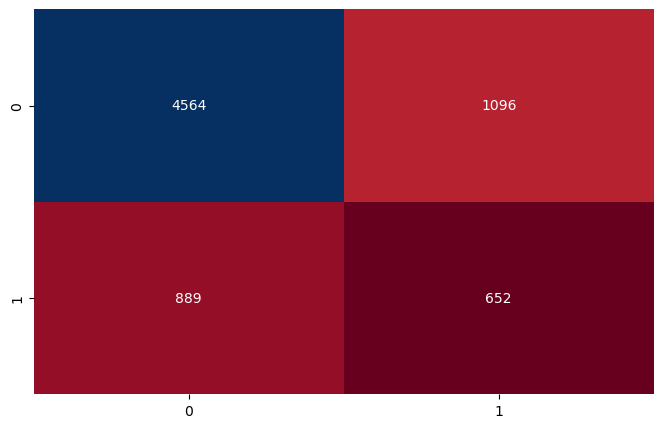

In [51]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

AUC: 0.6147311529615711


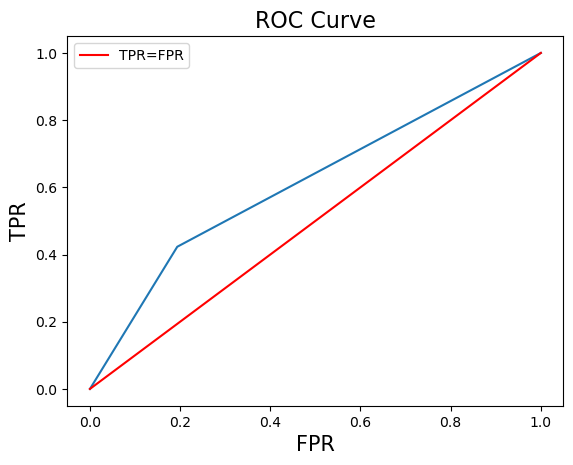

In [52]:
ypred_proba_adaboost = adaboost.predict_proba(x_test)

fpr_adaboost,tpr_adaboost,thresh_adaboost = plot_roc_auc(adaboost,y_test,ypred_proba_adaboost)

In [53]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473


In [54]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_lessthan_12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA_Principle City',
       'census_msa_Non-MSA'],
     

## XGBoost Classifier


Training Score is: 82.11 %
Testing Score is: 81.56 %

Accuracy_Score is 0.8156
precision Score is: 0.6485
Recall Score is: 0.3018
kappa Score is: 0.3194
F1 Score is: 0.4119

Confusion Matrix is
 [[5408  252]
 [1076  465]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5660
           1       0.65      0.30      0.41      1541

    accuracy                           0.82      7201
   macro avg       0.74      0.63      0.65      7201
weighted avg       0.79      0.82      0.79      7201



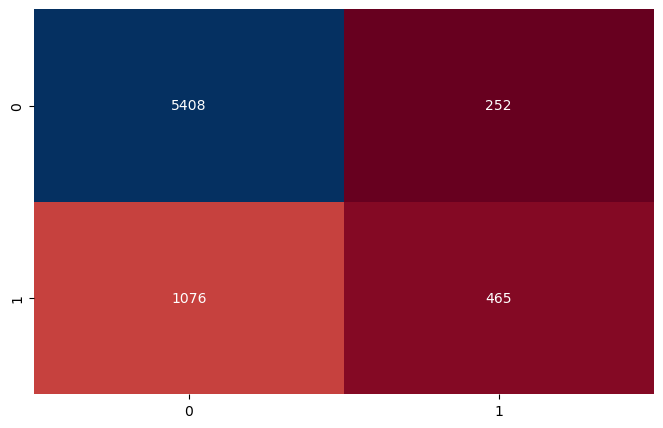

In [55]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

AUC: 0.7917854268372381


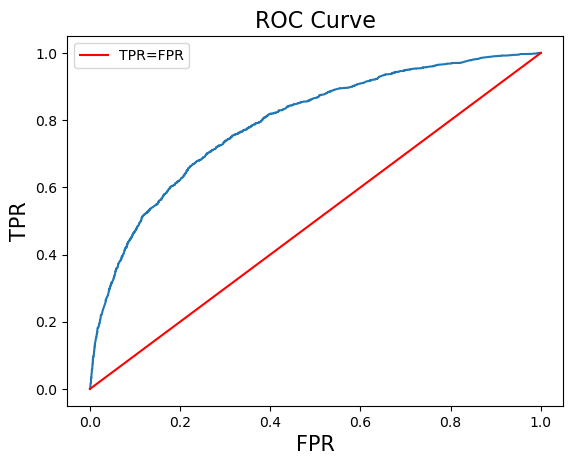

In [56]:
ypred_proba_xgbm = xgbm.predict_proba(x_test)

fpr_xgbm,tpr_xgbm,thresh_xgbm = plot_roc_auc(xgbm,y_test,ypred_proba_xgbm)

# Random Forest Classifier


Training Score is: 100.0 %
Testing Score is: 81.66 %

Accuracy_Score is 0.8166
precision Score is: 0.6662
Recall Score is: 0.2862
kappa Score is: 0.3119
F1 Score is: 0.4004

Confusion Matrix is
 [[5439  221]
 [1100  441]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5660
           1       0.67      0.29      0.40      1541

    accuracy                           0.82      7201
   macro avg       0.75      0.62      0.65      7201
weighted avg       0.80      0.82      0.79      7201



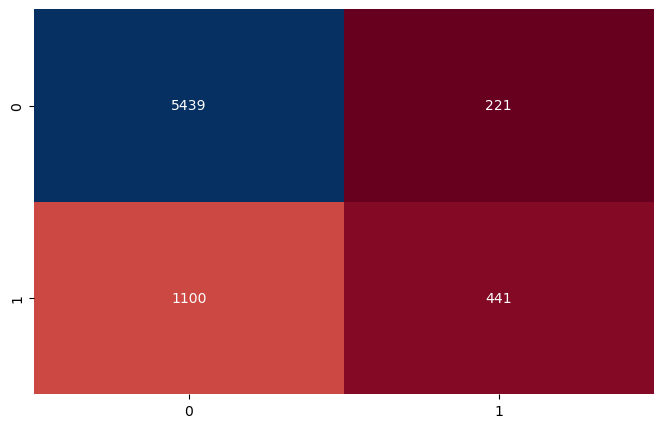

In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf,x_train,x_test,y_train,y_test)

AUC: 0.7891204600747989


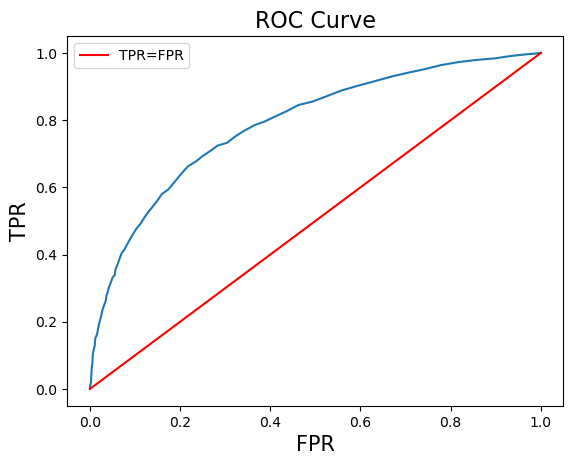

In [58]:
ypred_proba_rf = rf.predict_proba(x_test)

fpr_rf,tpr_rf,thresh_rf = plot_roc_auc(rf,y_test,ypred_proba_rf)

In [59]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363


### Random Forest with GridSearchCV

In [60]:
tuned_paramaters = [{'n_estimators': [ 85, 100], 'min_samples_split': [15,20], 'max_depth': [8, 10], 'min_samples_leaf': [5,10], 'max_leaf_nodes': [10, 15] }]

rf_CV= RandomForestClassifier(random_state = 10)

grid = GridSearchCV(estimator = rf_CV, param_grid = tuned_paramaters, cv = 10)

rf_grid = grid.fit(x_train, y_train)

print('Best parameters for random forest Classifier: ', rf_grid.best_params_, '\n')

Best parameters for random forest Classifier:  {'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 100} 




Training Score is: 80.04 %
Testing Score is: 79.92 %

Accuracy_Score is 0.7992
precision Score is: 0.795
Recall Score is: 0.0831
kappa Score is: 0.1146
F1 Score is: 0.1504

Confusion Matrix is
 [[5627   33]
 [1413  128]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      5660
           1       0.80      0.08      0.15      1541

    accuracy                           0.80      7201
   macro avg       0.80      0.54      0.52      7201
weighted avg       0.80      0.80      0.73      7201



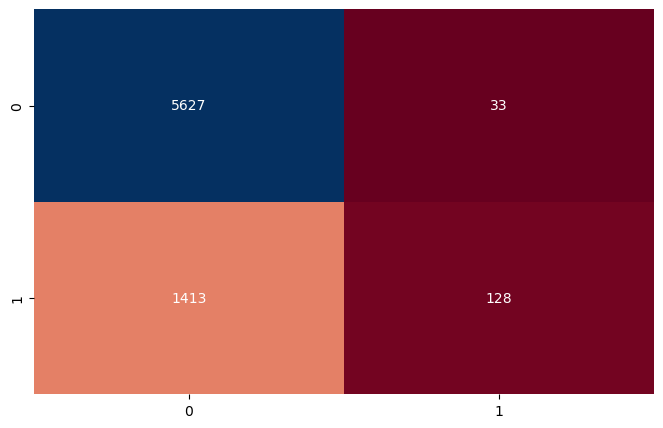

In [61]:
rf2 = RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=10, min_samples_split=15, n_estimators=100)
eval_model(rf2,x_train,x_test,y_train,y_test)

AUC: 0.7904355163803047


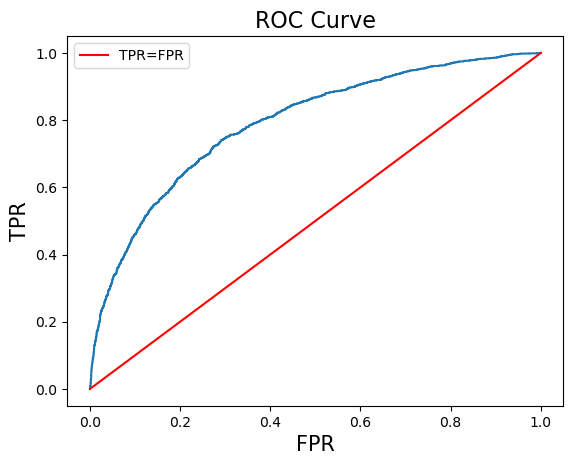

In [62]:
ypred_proba_rf2 = rf2.predict_proba(x_test)

fpr_rf2,tpr_rf2,thresh_rf2 = plot_roc_auc(rf2,y_test,ypred_proba_rf2)

In [63]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411


# Naive Bayes Classifier


Training Score is: 76.53999999999999 %
Testing Score is: 77.23 %

Accuracy_Score is 0.7723
precision Score is: 0.4723
Recall Score is: 0.5483
kappa Score is: 0.3605
F1 Score is: 0.5075

Confusion Matrix is
 [[4716  944]
 [ 696  845]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5660
           1       0.47      0.55      0.51      1541

    accuracy                           0.77      7201
   macro avg       0.67      0.69      0.68      7201
weighted avg       0.79      0.77      0.78      7201



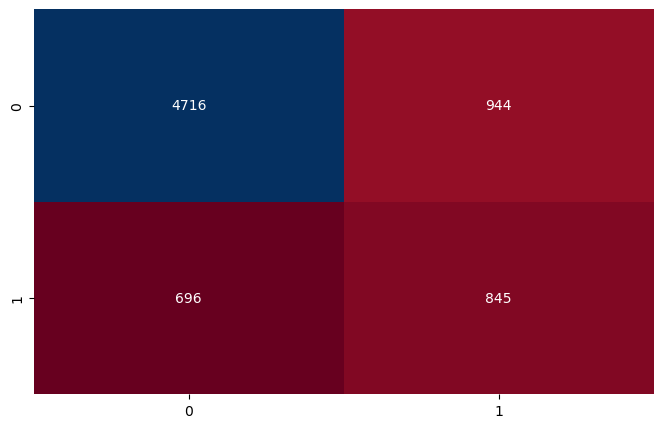

In [64]:
gnb = GaussianNB()
eval_model(gnb,x_train,x_test,y_train,y_test)

AUC: 0.7696124539386336


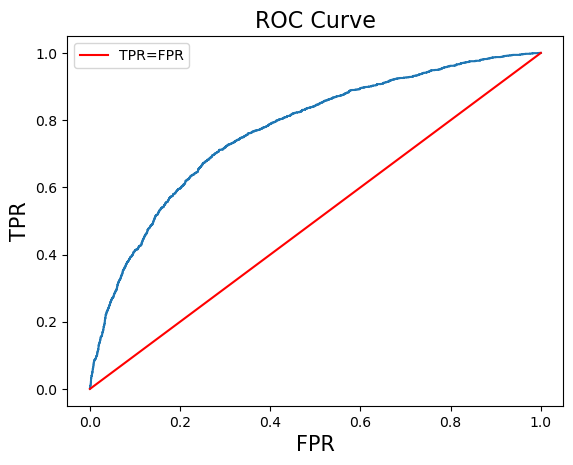

In [65]:
ypred_proba_gnb = gnb.predict_proba(x_test)

fpr_gnb,tpr_gnb,thresh_gnb = plot_roc_auc(gnb,y_test,ypred_proba_gnb)

In [66]:
update_score_card(model_name = 'Naive Bayes Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508


# KNN Classifier


Training Score is: 79.03999999999999 %
Testing Score is: 77.23 %

Accuracy_Score is 0.7723
precision Score is: 0.2235
Recall Score is: 0.026
kappa Score is: 0.0021
F1 Score is: 0.0465

Confusion Matrix is
 [[5521  139]
 [1501   40]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      5660
           1       0.22      0.03      0.05      1541

    accuracy                           0.77      7201
   macro avg       0.50      0.50      0.46      7201
weighted avg       0.67      0.77      0.69      7201



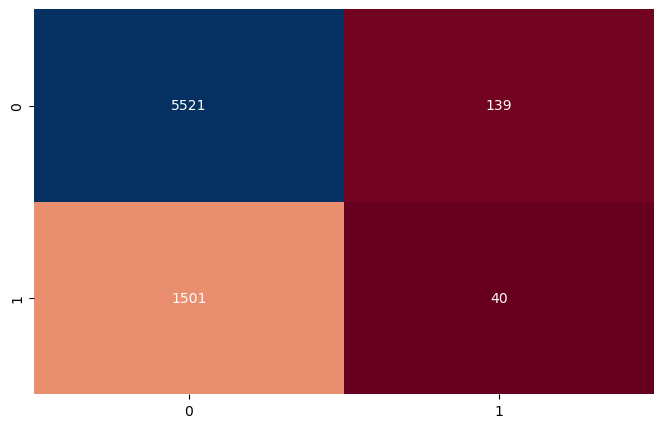

In [67]:
knn1 = KNeighborsClassifier(n_neighbors=9)
eval_model(knn1,x_train,x_test,y_train,y_test)

AUC: 0.5148313586469251


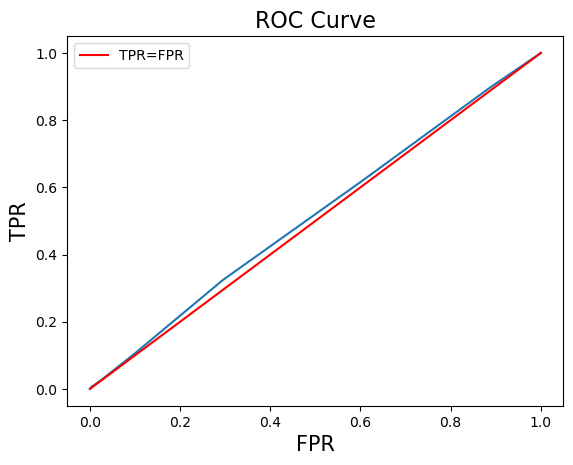

In [68]:
ypred_proba_knn1 = knn1.predict_proba(x_test)

fpr_knn1,tpr_knn1,thresh_knn1 = plot_roc_auc(knn1,y_test,ypred_proba_knn1)

In [69]:
update_score_card(model_name = 'KNN')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512


### To find optimal number of neighbors for KNN

In [70]:
neighbors = list(range(3,51,2))
knn_acc = []
for i in neighbors:
# i = 3,5...49
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    knn_acc.append(accuracy_score(y_test,ypred))

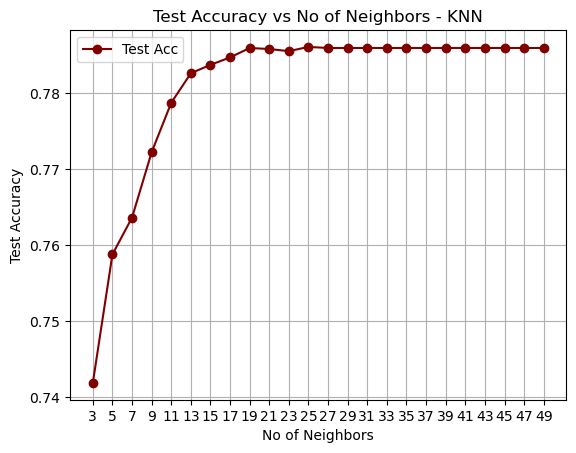

In [71]:
plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
plt.title('Test Accuracy vs No of Neighbors - KNN')
plt.xlabel('No of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()


Training Score is: 78.8 %
Testing Score is: 77.88000000000001 %

Accuracy_Score is 0.7788
precision Score is: 0.2347
Recall Score is: 0.0149
kappa Score is: 0.0025
F1 Score is: 0.0281

Confusion Matrix is
 [[5585   75]
 [1518   23]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5660
           1       0.23      0.01      0.03      1541

    accuracy                           0.78      7201
   macro avg       0.51      0.50      0.45      7201
weighted avg       0.67      0.78      0.69      7201



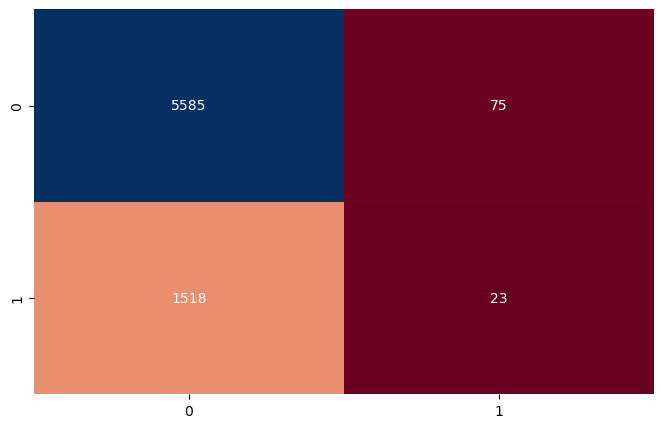

In [72]:
knn2 = KNeighborsClassifier(n_neighbors=11)
eval_model(knn2,x_train,x_test,y_train,y_test)

AUC: 0.5136642605072655


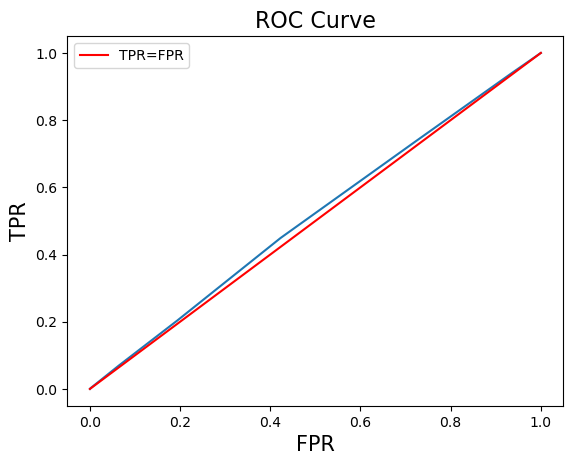

In [73]:
ypred_proba_knn2 = knn2.predict_proba(x_test)

fpr_knn2,tpr_knn2,thresh_knn2 = plot_roc_auc(knn2,y_test,ypred_proba_knn2)

In [74]:
update_score_card(model_name = 'KNN with optimal neigbours')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512


# Support Vector Classifier


Training Score is: 79.24 %
Testing Score is: 79.43 %

Accuracy_Score is 0.7943
precision Score is: 0.5502
Recall Score is: 0.2135
kappa Score is: 0.2135
F1 Score is: 0.3076

Confusion Matrix is
 [[5391  269]
 [1212  329]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5660
           1       0.55      0.21      0.31      1541

    accuracy                           0.79      7201
   macro avg       0.68      0.58      0.59      7201
weighted avg       0.76      0.79      0.76      7201



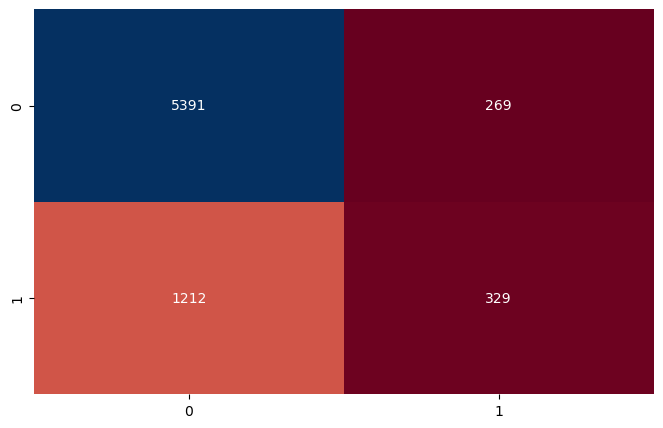

In [75]:
# SVM using linear kernel
sv1= SVC(kernel='linear')
eval_model(sv1,x_train,x_test,y_train,y_test)

In [76]:
update_score_card(model_name = 'Support Vector using Linear kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512



Training Score is: 78.48 %
Testing Score is: 78.60000000000001 %

Accuracy_Score is 0.786
precision Score is: 0.0
Recall Score is: 0.0
kappa Score is: 0.0
F1 Score is: 0.0

Confusion Matrix is
 [[5660    0]
 [1541    0]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5660
           1       0.00      0.00      0.00      1541

    accuracy                           0.79      7201
   macro avg       0.39      0.50      0.44      7201
weighted avg       0.62      0.79      0.69      7201



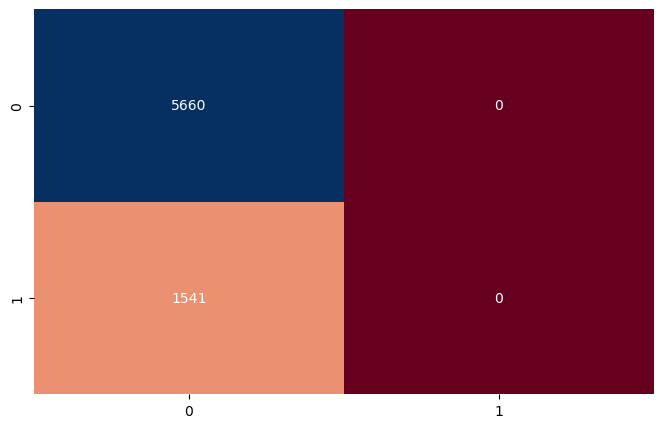

In [77]:
# SVM using Gaussian kernel
sv_gaussian= SVC(kernel='rbf')
eval_model(sv_gaussian,x_train,x_test,y_train,y_test)

In [78]:
update_score_card(model_name = 'Support Vector using Gaussian kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512



Training Score is: 66.43 %
Testing Score is: 66.23 %

Accuracy_Score is 0.6623
precision Score is: 0.2075
Recall Score is: 0.2051
kappa Score is: -0.0082
F1 Score is: 0.2063

Confusion Matrix is
 [[4453 1207]
 [1225  316]]

Predictions:
 [0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      5660
           1       0.21      0.21      0.21      1541

    accuracy                           0.66      7201
   macro avg       0.50      0.50      0.50      7201
weighted avg       0.66      0.66      0.66      7201



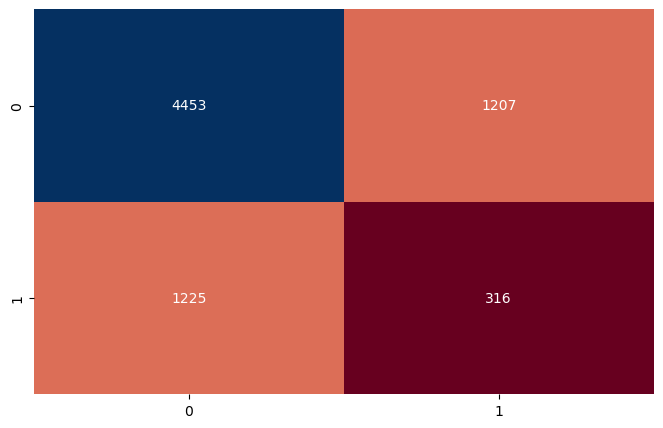

In [79]:
# SVM using Sigmoid kernel
sv_sigmoid= SVC(kernel='sigmoid')
eval_model(sv_sigmoid,x_train,x_test,y_train,y_test)

In [80]:
update_score_card(model_name = 'Support Vector using Sigmoid kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512



Training Score is: 78.48 %
Testing Score is: 78.60000000000001 %

Accuracy_Score is 0.786
precision Score is: 0.0
Recall Score is: 0.0
kappa Score is: 0.0
F1 Score is: 0.0

Confusion Matrix is
 [[5660    0]
 [1541    0]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5660
           1       0.00      0.00      0.00      1541

    accuracy                           0.79      7201
   macro avg       0.39      0.50      0.44      7201
weighted avg       0.62      0.79      0.69      7201



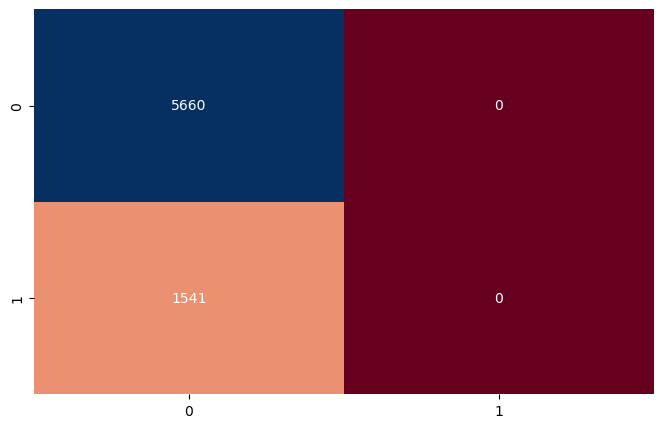

In [81]:
# SVM using Polynomial kernel
sv_poly= SVC(kernel='poly')
eval_model(sv_poly,x_train,x_test,y_train,y_test)

In [82]:
update_score_card(model_name = 'Support Vector using Polynomial kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512


In [83]:
# SVM using Polynomial kernel using GridSearchCV
tuned_paramaters = [{ 'degree': [2, 4], 'gamma' : ['auto','scale' ], 'C': [0.5, 1] }]

svm_CV= SVC(random_state = 10)

grid = GridSearchCV(estimator=svm_CV , param_grid=tuned_paramaters, scoring='accuracy', cv= 5)

svm_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', svm_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'C': 0.5, 'degree': 2, 'gamma': 'scale'} 




Training Score is: 78.48 %
Testing Score is: 78.60000000000001 %

Accuracy_Score is 0.786
precision Score is: 0.0
Recall Score is: 0.0
kappa Score is: 0.0
F1 Score is: 0.0

Confusion Matrix is
 [[5660    0]
 [1541    0]]

Predictions:
 [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5660
           1       0.00      0.00      0.00      1541

    accuracy                           0.79      7201
   macro avg       0.39      0.50      0.44      7201
weighted avg       0.62      0.79      0.69      7201



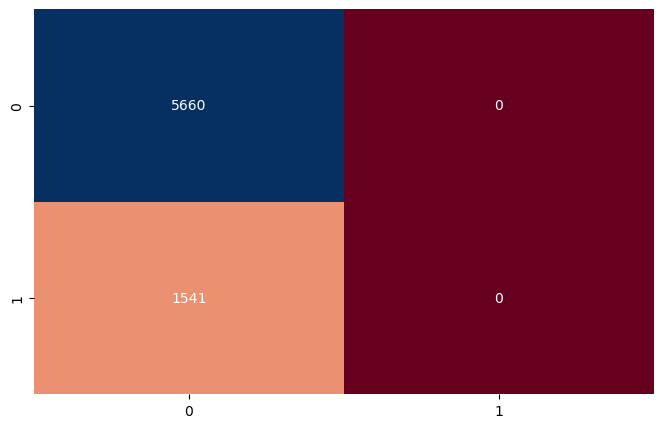

In [84]:
sv_poly_cv= SVC(kernel='poly', C=1, degree=2, gamma='scale')
eval_model(sv_poly_cv,x_train,x_test,y_train,y_test)

In [85]:
update_score_card(model_name = 'Support Vector Polynomial with Grid search CV')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512


# Model Comparision

In [86]:
score_card

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.800786,0.800306,0.750911,0.582137,0.236859,0.800306,0.243017,0.336716
1,Logistic Regression using SGD,0.215166,0.213998,0.750911,0.213998,1.000000,0.213998,0.000000,0.352551
2,Decision Tree Classifier,1.000000,0.723788,0.609891,0.369312,0.410772,0.723788,0.211157,0.388940
3,Decision Tree with Pruning,0.827689,0.808915,0.758377,0.606727,0.304348,0.808915,0.306158,0.405359
4,Bagging Ensemble,0.979466,0.801000,0.728342,0.564286,0.307592,0.801000,0.291115,0.398152
5,Adaboost Ensemble,1.000000,0.724344,0.614731,0.372998,0.423102,0.724344,0.218769,0.396473
6,Random Forest,1.000000,0.816553,0.789120,0.666163,0.286178,0.816553,0.311860,0.400363
7,Random Forest with Pruning,0.800429,0.799195,0.790436,0.795031,0.083063,0.799195,0.114563,0.150411
8,Naive Bayes Classifier,0.765371,0.772254,0.769612,0.472331,0.548345,0.772254,0.360453,0.507508
9,KNN,0.790429,0.772254,0.514831,0.223464,0.025957,0.772254,0.002062,0.046512
